In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import itertools
import csv

In [2]:
df = pd.read_csv("newMushroom33noise.csv", sep=',')
df.columns.values
df.shape

(5644, 24)

In [3]:
data = df.iloc[:,1:23]
labels = df.iloc[:,23].astype(str)

In [4]:
kf = KFold(n_splits=2, shuffle=True) #5 fores me 2 folds

In [5]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

### Euclidean metric and k tuning

              precision    recall  f1-score   support

           p       0.81      0.79      0.80      1776
           e       0.66      0.68      0.67      1046

   micro avg       0.75      0.75      0.75      2822
   macro avg       0.73      0.74      0.73      2822
weighted avg       0.75      0.75      0.75      2822

accuracy:  0.7508858965272857


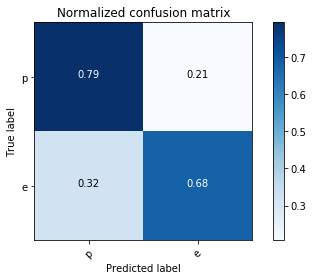

              precision    recall  f1-score   support

           p       0.79      0.81      0.80      1712
           e       0.69      0.67      0.68      1110

   micro avg       0.75      0.75      0.75      2822
   macro avg       0.74      0.74      0.74      2822
weighted avg       0.75      0.75      0.75      2822

accuracy:  0.7533664068036854


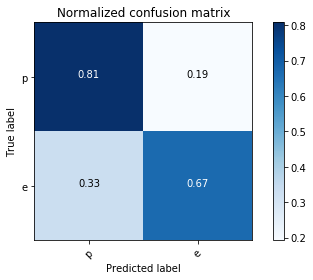

              precision    recall  f1-score   support

           p       0.80      0.84      0.82      1753
           e       0.71      0.66      0.69      1069

   micro avg       0.77      0.77      0.77      2822
   macro avg       0.76      0.75      0.75      2822
weighted avg       0.77      0.77      0.77      2822

accuracy:  0.7700212615166548


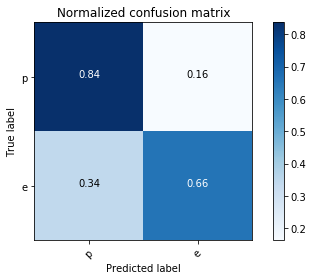

              precision    recall  f1-score   support

           p       0.80      0.78      0.79      1735
           e       0.66      0.68      0.67      1087

   micro avg       0.74      0.74      0.74      2822
   macro avg       0.73      0.73      0.73      2822
weighted avg       0.75      0.74      0.75      2822

accuracy:  0.7445074415308292


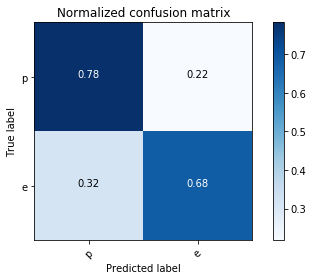

              precision    recall  f1-score   support

           p       0.80      0.79      0.80      1728
           e       0.68      0.69      0.69      1094

   micro avg       0.76      0.76      0.76      2822
   macro avg       0.74      0.74      0.74      2822
weighted avg       0.76      0.76      0.76      2822

accuracy:  0.7551381998582566


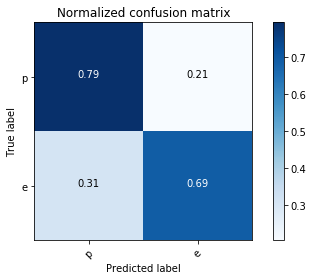

              precision    recall  f1-score   support

           p       0.80      0.79      0.80      1760
           e       0.66      0.67      0.67      1062

   micro avg       0.75      0.75      0.75      2822
   macro avg       0.73      0.73      0.73      2822
weighted avg       0.75      0.75      0.75      2822

accuracy:  0.7469879518072289


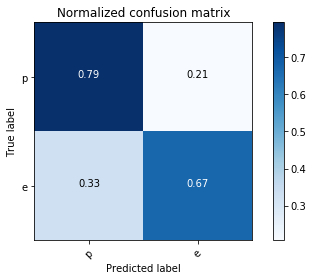

              precision    recall  f1-score   support

           p       0.80      0.80      0.80      1712
           e       0.69      0.69      0.69      1110

   micro avg       0.75      0.75      0.75      2822
   macro avg       0.74      0.74      0.74      2822
weighted avg       0.75      0.75      0.75      2822

accuracy:  0.7540751240255138


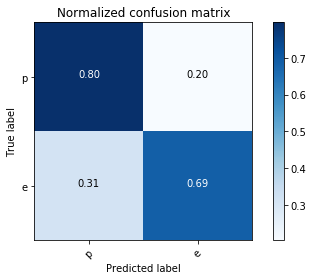

              precision    recall  f1-score   support

           p       0.81      0.79      0.80      1776
           e       0.66      0.68      0.67      1046

   micro avg       0.75      0.75      0.75      2822
   macro avg       0.73      0.73      0.73      2822
weighted avg       0.75      0.75      0.75      2822

accuracy:  0.7498228206945429


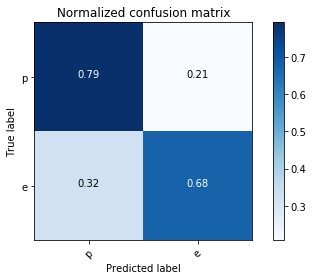

              precision    recall  f1-score   support

           p       0.80      0.80      0.80      1753
           e       0.68      0.68      0.68      1069

   micro avg       0.75      0.75      0.75      2822
   macro avg       0.74      0.74      0.74      2822
weighted avg       0.76      0.75      0.75      2822

accuracy:  0.7547838412473423


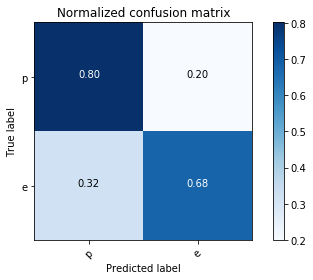

              precision    recall  f1-score   support

           p       0.80      0.78      0.79      1735
           e       0.66      0.68      0.67      1087

   micro avg       0.74      0.74      0.74      2822
   macro avg       0.73      0.73      0.73      2822
weighted avg       0.75      0.74      0.74      2822

accuracy:  0.7437987243090007


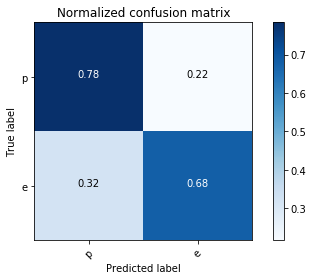

In [6]:
acc =[]
acc.append("Euclidean 1")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=1, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            #print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

              precision    recall  f1-score   support

           p       0.79      0.86      0.82      1731
           e       0.74      0.64      0.69      1091

   micro avg       0.77      0.77      0.77      2822
   macro avg       0.76      0.75      0.75      2822
weighted avg       0.77      0.77      0.77      2822

accuracy:  0.7728561304039688


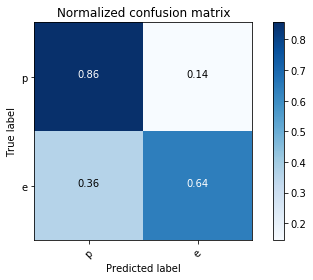

              precision    recall  f1-score   support

           p       0.79      0.84      0.82      1757
           e       0.71      0.64      0.67      1065

   micro avg       0.77      0.77      0.77      2822
   macro avg       0.75      0.74      0.75      2822
weighted avg       0.76      0.77      0.76      2822

accuracy:  0.7664776754075124


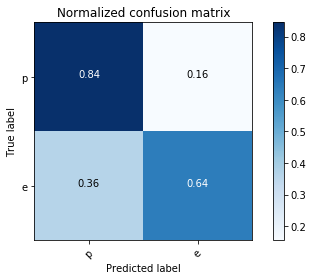

              precision    recall  f1-score   support

           p       0.79      0.83      0.81      1750
           e       0.70      0.64      0.67      1072

   micro avg       0.76      0.76      0.76      2822
   macro avg       0.75      0.74      0.74      2822
weighted avg       0.76      0.76      0.76      2822

accuracy:  0.7590361445783133


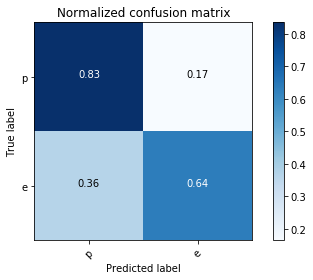

              precision    recall  f1-score   support

           p       0.78      0.85      0.82      1738
           e       0.72      0.62      0.67      1084

   micro avg       0.76      0.76      0.76      2822
   macro avg       0.75      0.74      0.74      2822
weighted avg       0.76      0.76      0.76      2822

accuracy:  0.7639971651311127


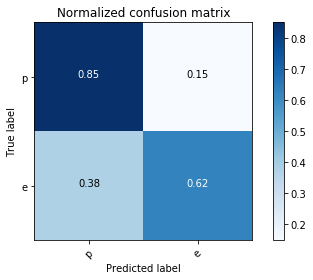

              precision    recall  f1-score   support

           p       0.80      0.82      0.81      1773
           e       0.68      0.66      0.67      1049

   micro avg       0.76      0.76      0.76      2822
   macro avg       0.74      0.74      0.74      2822
weighted avg       0.76      0.76      0.76      2822

accuracy:  0.7604535790219702


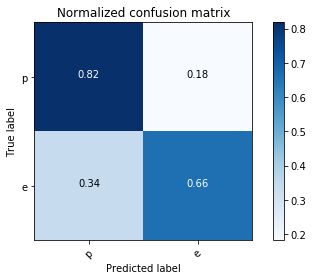

              precision    recall  f1-score   support

           p       0.77      0.85      0.81      1715
           e       0.72      0.60      0.66      1107

   micro avg       0.75      0.75      0.75      2822
   macro avg       0.74      0.73      0.73      2822
weighted avg       0.75      0.75      0.75      2822

accuracy:  0.7515946137491141


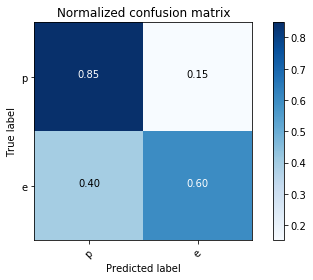

              precision    recall  f1-score   support

           p       0.78      0.86      0.82      1742
           e       0.73      0.60      0.66      1080

   micro avg       0.76      0.76      0.76      2822
   macro avg       0.75      0.73      0.74      2822
weighted avg       0.76      0.76      0.76      2822

accuracy:  0.7604535790219702


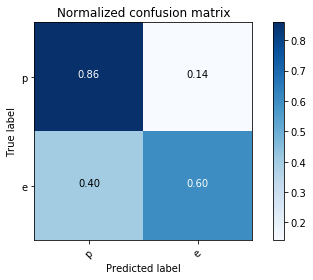

              precision    recall  f1-score   support

           p       0.80      0.82      0.81      1746
           e       0.70      0.66      0.68      1076

   micro avg       0.76      0.76      0.76      2822
   macro avg       0.75      0.74      0.74      2822
weighted avg       0.76      0.76      0.76      2822

accuracy:  0.7597448618001418


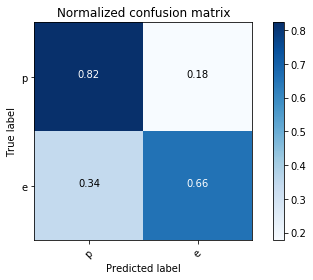

              precision    recall  f1-score   support

           p       0.80      0.82      0.81      1756
           e       0.70      0.66      0.68      1066

   micro avg       0.76      0.76      0.76      2822
   macro avg       0.75      0.74      0.74      2822
weighted avg       0.76      0.76      0.76      2822

accuracy:  0.7618710134656272


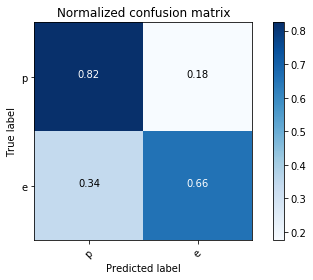

              precision    recall  f1-score   support

           p       0.77      0.85      0.81      1732
           e       0.72      0.60      0.66      1090

   micro avg       0.76      0.76      0.76      2822
   macro avg       0.75      0.73      0.73      2822
weighted avg       0.75      0.76      0.75      2822

accuracy:  0.7551381998582566


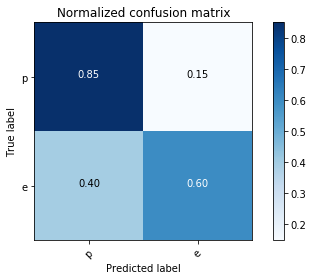

In [7]:
acc.append("Euclidean 5")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=5, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            #print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

              precision    recall  f1-score   support

           p       0.78      0.90      0.83      1769
           e       0.77      0.57      0.65      1053

   micro avg       0.77      0.77      0.77      2822
   macro avg       0.77      0.73      0.74      2822
weighted avg       0.77      0.77      0.77      2822

accuracy:  0.7749822820694543


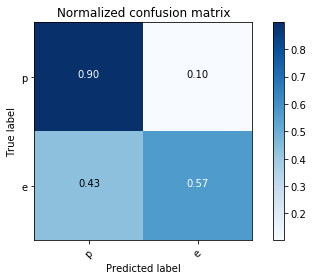

              precision    recall  f1-score   support

           p       0.76      0.91      0.83      1719
           e       0.79      0.55      0.65      1103

   micro avg       0.77      0.77      0.77      2822
   macro avg       0.78      0.73      0.74      2822
weighted avg       0.77      0.77      0.76      2822

accuracy:  0.7689581856839122


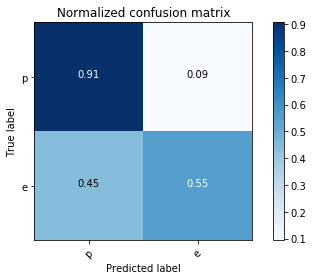

              precision    recall  f1-score   support

           p       0.75      0.91      0.82      1729
           e       0.78      0.53      0.63      1093

   micro avg       0.76      0.76      0.76      2822
   macro avg       0.77      0.72      0.73      2822
weighted avg       0.76      0.76      0.75      2822

accuracy:  0.7608079376328845


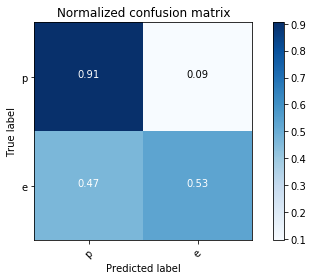

              precision    recall  f1-score   support

           p       0.78      0.88      0.83      1759
           e       0.75      0.58      0.65      1063

   micro avg       0.77      0.77      0.77      2822
   macro avg       0.76      0.73      0.74      2822
weighted avg       0.77      0.77      0.76      2822

accuracy:  0.7689581856839122


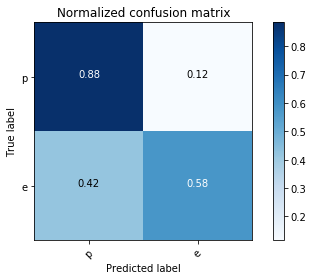

              precision    recall  f1-score   support

           p       0.76      0.91      0.83      1731
           e       0.80      0.55      0.65      1091

   micro avg       0.77      0.77      0.77      2822
   macro avg       0.78      0.73      0.74      2822
weighted avg       0.78      0.77      0.76      2822

accuracy:  0.7742735648476258


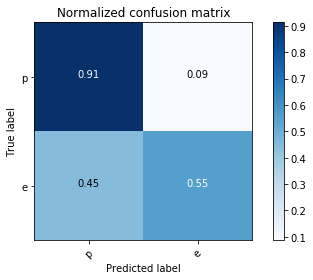

              precision    recall  f1-score   support

           p       0.78      0.89      0.83      1757
           e       0.76      0.58      0.66      1065

   micro avg       0.77      0.77      0.77      2822
   macro avg       0.77      0.73      0.74      2822
weighted avg       0.77      0.77      0.76      2822

accuracy:  0.7714386959603118


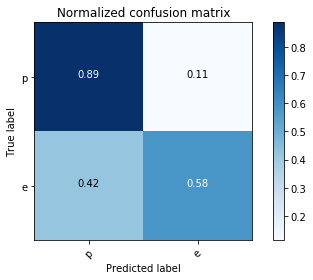

              precision    recall  f1-score   support

           p       0.78      0.90      0.84      1772
           e       0.77      0.57      0.66      1050

   micro avg       0.78      0.78      0.78      2822
   macro avg       0.78      0.74      0.75      2822
weighted avg       0.78      0.78      0.77      2822

accuracy:  0.7785258681785967


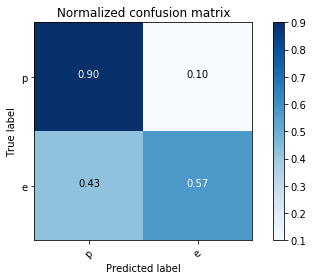

              precision    recall  f1-score   support

           p       0.76      0.90      0.82      1716
           e       0.79      0.55      0.65      1106

   micro avg       0.76      0.76      0.76      2822
   macro avg       0.77      0.73      0.74      2822
weighted avg       0.77      0.76      0.75      2822

accuracy:  0.7647058823529411


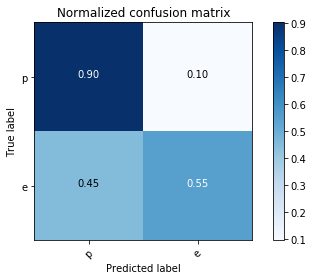

              precision    recall  f1-score   support

           p       0.77      0.90      0.83      1745
           e       0.78      0.56      0.65      1077

   micro avg       0.77      0.77      0.77      2822
   macro avg       0.78      0.73      0.74      2822
weighted avg       0.77      0.77      0.76      2822

accuracy:  0.7725017717930546


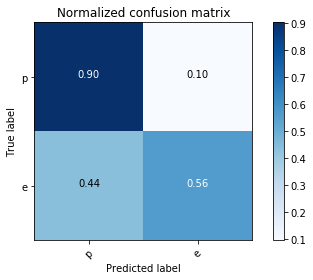

              precision    recall  f1-score   support

           p       0.76      0.89      0.82      1743
           e       0.75      0.55      0.63      1079

   micro avg       0.76      0.76      0.76      2822
   macro avg       0.75      0.72      0.73      2822
weighted avg       0.76      0.76      0.75      2822

accuracy:  0.757264351523742


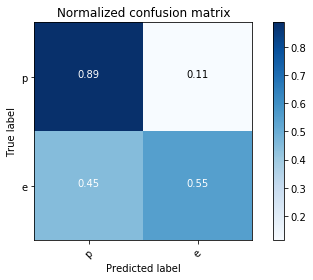

In [8]:
acc.append("Euclidean 10")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=10, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

              precision    recall  f1-score   support

           p       0.77      0.86      0.81      1757
           e       0.72      0.58      0.64      1065

   micro avg       0.76      0.76      0.76      2822
   macro avg       0.75      0.72      0.73      2822
weighted avg       0.75      0.76      0.75      2822

accuracy:  0.7554925584691708


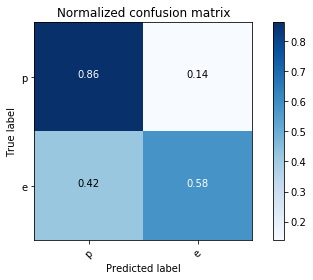

              precision    recall  f1-score   support

           p       0.76      0.89      0.82      1731
           e       0.76      0.56      0.65      1091

   micro avg       0.76      0.76      0.76      2822
   macro avg       0.76      0.73      0.73      2822
weighted avg       0.76      0.76      0.75      2822

accuracy:  0.7625797306874557


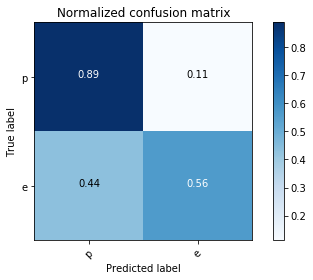

              precision    recall  f1-score   support

           p       0.76      0.88      0.82      1722
           e       0.76      0.57      0.65      1100

   micro avg       0.76      0.76      0.76      2822
   macro avg       0.76      0.73      0.73      2822
weighted avg       0.76      0.76      0.75      2822

accuracy:  0.7611622962437987


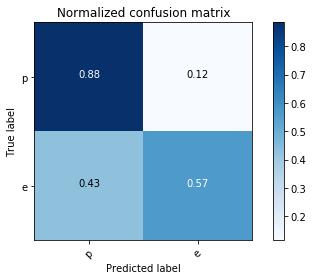

              precision    recall  f1-score   support

           p       0.78      0.88      0.82      1766
           e       0.74      0.58      0.65      1056

   micro avg       0.77      0.77      0.77      2822
   macro avg       0.76      0.73      0.74      2822
weighted avg       0.76      0.77      0.76      2822

accuracy:  0.7650602409638554


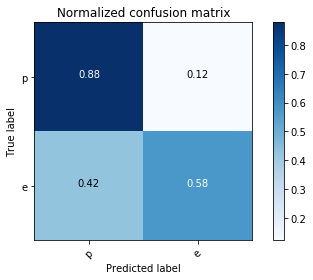

              precision    recall  f1-score   support

           p       0.78      0.88      0.82      1746
           e       0.75      0.59      0.66      1076

   micro avg       0.77      0.77      0.77      2822
   macro avg       0.76      0.73      0.74      2822
weighted avg       0.77      0.77      0.76      2822

accuracy:  0.7686038270729979


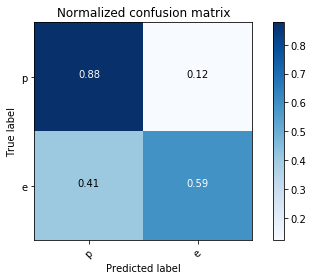

              precision    recall  f1-score   support

           p       0.76      0.86      0.81      1742
           e       0.72      0.57      0.64      1080

   micro avg       0.75      0.75      0.75      2822
   macro avg       0.74      0.72      0.72      2822
weighted avg       0.75      0.75      0.74      2822

accuracy:  0.7508858965272857


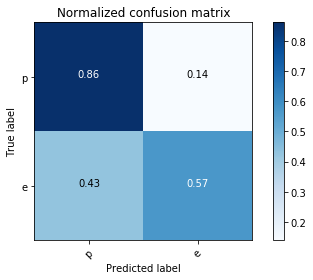

              precision    recall  f1-score   support

           p       0.76      0.88      0.82      1727
           e       0.74      0.57      0.64      1095

   micro avg       0.76      0.76      0.76      2822
   macro avg       0.75      0.72      0.73      2822
weighted avg       0.76      0.76      0.75      2822

accuracy:  0.7569099929128278


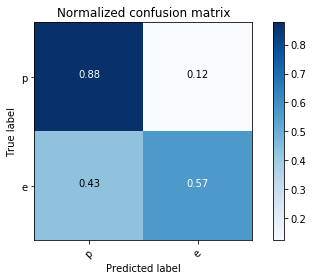

              precision    recall  f1-score   support

           p       0.77      0.87      0.82      1761
           e       0.73      0.57      0.64      1061

   micro avg       0.76      0.76      0.76      2822
   macro avg       0.75      0.72      0.73      2822
weighted avg       0.76      0.76      0.75      2822

accuracy:  0.7590361445783133


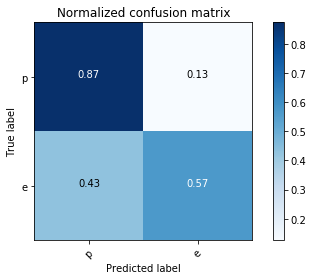

              precision    recall  f1-score   support

           p       0.76      0.88      0.82      1740
           e       0.74      0.56      0.64      1082

   micro avg       0.76      0.76      0.76      2822
   macro avg       0.75      0.72      0.73      2822
weighted avg       0.76      0.76      0.75      2822

accuracy:  0.7579730687455705


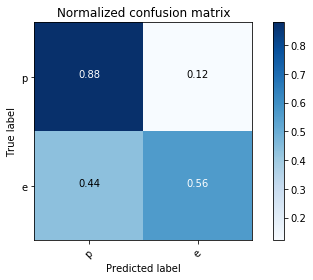

              precision    recall  f1-score   support

           p       0.76      0.88      0.82      1748
           e       0.73      0.55      0.63      1074

   micro avg       0.75      0.75      0.75      2822
   macro avg       0.75      0.72      0.72      2822
weighted avg       0.75      0.75      0.75      2822

accuracy:  0.7540751240255138


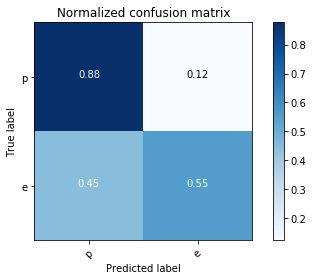

In [9]:
acc.append("Euclidean 15")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=15, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
#             print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

              precision    recall  f1-score   support

           p       0.75      0.89      0.81      1746
           e       0.73      0.51      0.60      1076

   micro avg       0.74      0.74      0.74      2822
   macro avg       0.74      0.70      0.71      2822
weighted avg       0.74      0.74      0.73      2822

accuracy:  0.7430900070871722


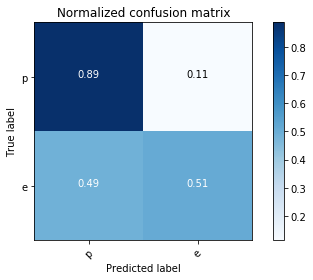

              precision    recall  f1-score   support

           p       0.76      0.91      0.83      1742
           e       0.79      0.55      0.65      1080

   micro avg       0.77      0.77      0.77      2822
   macro avg       0.78      0.73      0.74      2822
weighted avg       0.78      0.77      0.76      2822

accuracy:  0.7721474131821403


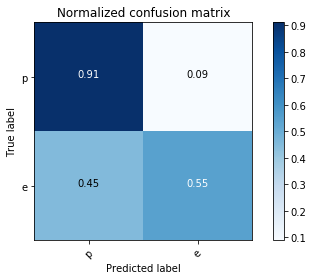

              precision    recall  f1-score   support

           p       0.75      0.91      0.82      1732
           e       0.78      0.51      0.62      1090

   micro avg       0.76      0.76      0.76      2822
   macro avg       0.77      0.71      0.72      2822
weighted avg       0.76      0.76      0.74      2822

accuracy:  0.7569099929128278


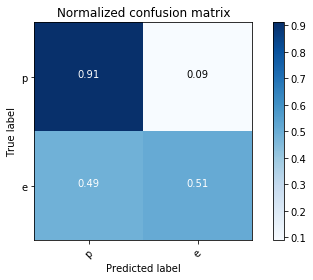

              precision    recall  f1-score   support

           p       0.77      0.89      0.82      1756
           e       0.76      0.55      0.64      1066

   micro avg       0.76      0.76      0.76      2822
   macro avg       0.76      0.72      0.73      2822
weighted avg       0.76      0.76      0.75      2822

accuracy:  0.7629340892983699


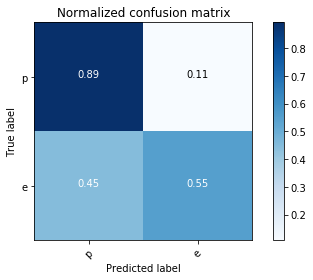

              precision    recall  f1-score   support

           p       0.74      0.91      0.82      1709
           e       0.79      0.51      0.62      1113

   micro avg       0.76      0.76      0.76      2822
   macro avg       0.77      0.71      0.72      2822
weighted avg       0.76      0.76      0.74      2822

accuracy:  0.7554925584691708


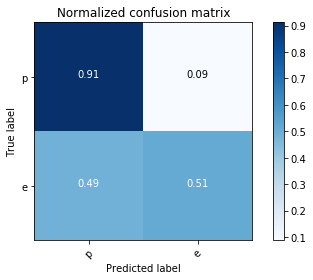

              precision    recall  f1-score   support

           p       0.77      0.90      0.83      1779
           e       0.76      0.55      0.64      1043

   micro avg       0.77      0.77      0.77      2822
   macro avg       0.76      0.72      0.73      2822
weighted avg       0.77      0.77      0.76      2822

accuracy:  0.7682494684620836


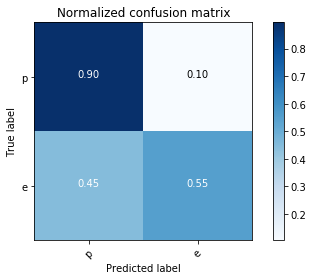

              precision    recall  f1-score   support

           p       0.74      0.90      0.81      1700
           e       0.78      0.52      0.62      1122

   micro avg       0.75      0.75      0.75      2822
   macro avg       0.76      0.71      0.72      2822
weighted avg       0.76      0.75      0.74      2822

accuracy:  0.7501771793054571


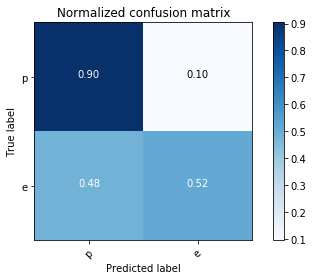

              precision    recall  f1-score   support

           p       0.77      0.90      0.83      1788
           e       0.76      0.55      0.63      1034

   micro avg       0.77      0.77      0.77      2822
   macro avg       0.76      0.72      0.73      2822
weighted avg       0.77      0.77      0.76      2822

accuracy:  0.7693125442948263


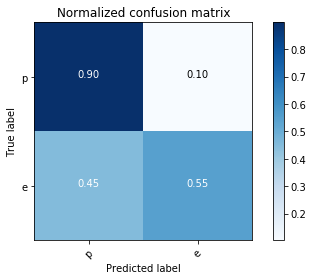

              precision    recall  f1-score   support

           p       0.76      0.91      0.83      1752
           e       0.79      0.53      0.63      1070

   micro avg       0.77      0.77      0.77      2822
   macro avg       0.77      0.72      0.73      2822
weighted avg       0.77      0.77      0.75      2822

accuracy:  0.7671863926293409


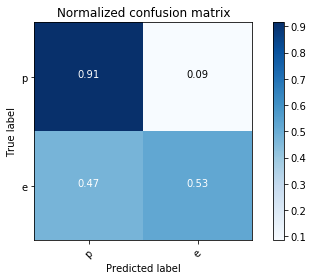

              precision    recall  f1-score   support

           p       0.75      0.90      0.82      1736
           e       0.76      0.53      0.62      1086

   micro avg       0.75      0.75      0.75      2822
   macro avg       0.76      0.71      0.72      2822
weighted avg       0.75      0.75      0.74      2822

accuracy:  0.7533664068036854


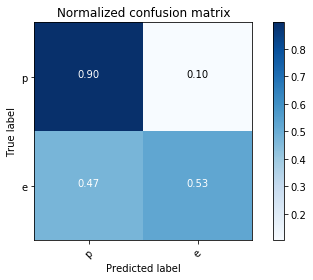

In [10]:
acc.append("Euclidean 20")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=20, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

              precision    recall  f1-score   support

           p       0.75      0.90      0.82      1749
           e       0.76      0.51      0.61      1073

   micro avg       0.75      0.75      0.75      2822
   macro avg       0.75      0.71      0.71      2822
weighted avg       0.75      0.75      0.74      2822

accuracy:  0.7519489723600283


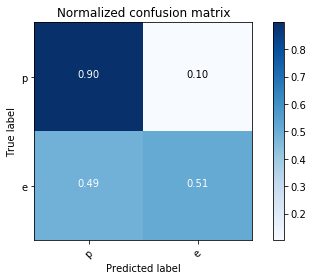

              precision    recall  f1-score   support

           p       0.74      0.93      0.82      1739
           e       0.80      0.48      0.60      1083

   micro avg       0.75      0.75      0.75      2822
   macro avg       0.77      0.70      0.71      2822
weighted avg       0.76      0.75      0.74      2822

accuracy:  0.7533664068036854


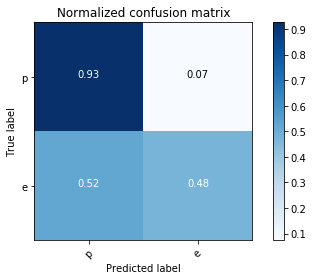

              precision    recall  f1-score   support

           p       0.75      0.90      0.82      1755
           e       0.76      0.51      0.61      1067

   micro avg       0.75      0.75      0.75      2822
   macro avg       0.75      0.70      0.71      2822
weighted avg       0.75      0.75      0.74      2822

accuracy:  0.7512402551381998


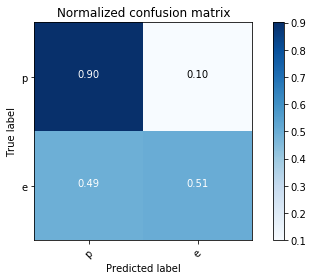

              precision    recall  f1-score   support

           p       0.74      0.92      0.82      1733
           e       0.79      0.49      0.60      1089

   micro avg       0.75      0.75      0.75      2822
   macro avg       0.76      0.70      0.71      2822
weighted avg       0.76      0.75      0.74      2822

accuracy:  0.7515946137491141


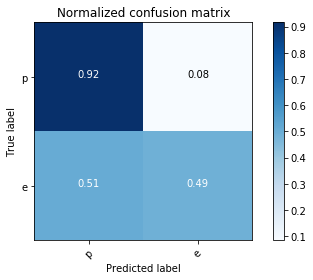

              precision    recall  f1-score   support

           p       0.75      0.90      0.82      1747
           e       0.77      0.52      0.62      1075

   micro avg       0.76      0.76      0.76      2822
   macro avg       0.76      0.71      0.72      2822
weighted avg       0.76      0.76      0.75      2822

accuracy:  0.757264351523742


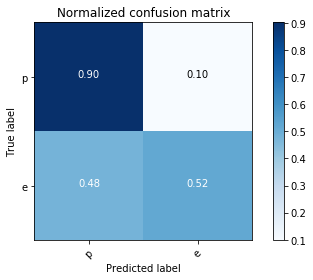

              precision    recall  f1-score   support

           p       0.74      0.92      0.82      1741
           e       0.78      0.47      0.59      1081

   micro avg       0.75      0.75      0.75      2822
   macro avg       0.76      0.70      0.70      2822
weighted avg       0.75      0.75      0.73      2822

accuracy:  0.7473423104181431


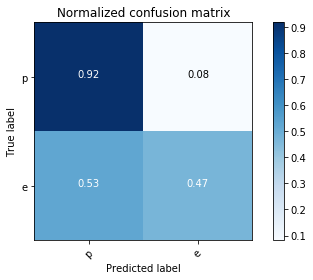

              precision    recall  f1-score   support

           p       0.75      0.91      0.82      1738
           e       0.79      0.51      0.62      1084

   micro avg       0.76      0.76      0.76      2822
   macro avg       0.77      0.71      0.72      2822
weighted avg       0.76      0.76      0.74      2822

accuracy:  0.757264351523742


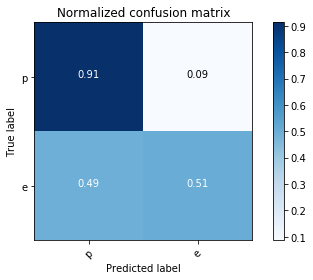

              precision    recall  f1-score   support

           p       0.75      0.92      0.83      1750
           e       0.79      0.50      0.61      1072

   micro avg       0.76      0.76      0.76      2822
   macro avg       0.77      0.71      0.72      2822
weighted avg       0.77      0.76      0.75      2822

accuracy:  0.7608079376328845


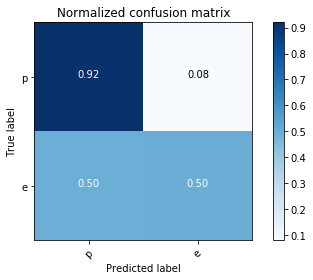

              precision    recall  f1-score   support

           p       0.76      0.91      0.83      1779
           e       0.76      0.51      0.61      1043

   micro avg       0.76      0.76      0.76      2822
   macro avg       0.76      0.71      0.72      2822
weighted avg       0.76      0.76      0.75      2822

accuracy:  0.7597448618001418


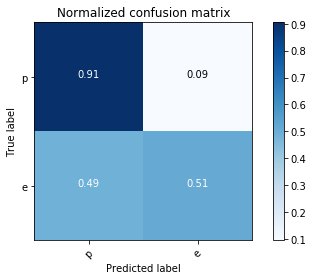

              precision    recall  f1-score   support

           p       0.73      0.92      0.82      1709
           e       0.79      0.49      0.61      1113

   micro avg       0.75      0.75      0.75      2822
   macro avg       0.76      0.70      0.71      2822
weighted avg       0.76      0.75      0.73      2822

accuracy:  0.7484053862508859


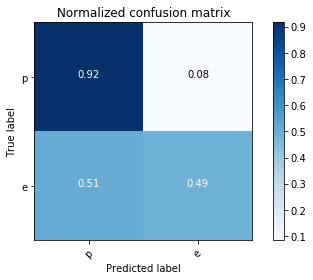

In [11]:
acc.append("Euclidean 30")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=30, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

              precision    recall  f1-score   support

           p       0.73      0.91      0.81      1744
           e       0.76      0.46      0.58      1078

   micro avg       0.74      0.74      0.74      2822
   macro avg       0.75      0.69      0.69      2822
weighted avg       0.74      0.74      0.72      2822

accuracy:  0.7391920623671155


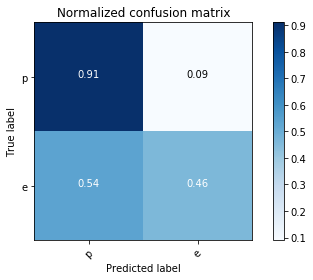

              precision    recall  f1-score   support

           p       0.73      0.94      0.82      1744
           e       0.81      0.43      0.56      1078

   micro avg       0.74      0.74      0.74      2822
   macro avg       0.77      0.68      0.69      2822
weighted avg       0.76      0.74      0.72      2822

accuracy:  0.741318214032601


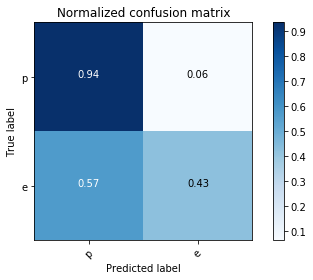

              precision    recall  f1-score   support

           p       0.73      0.92      0.81      1744
           e       0.77      0.44      0.56      1078

   micro avg       0.73      0.73      0.73      2822
   macro avg       0.75      0.68      0.68      2822
weighted avg       0.74      0.73      0.71      2822

accuracy:  0.7342310418143161


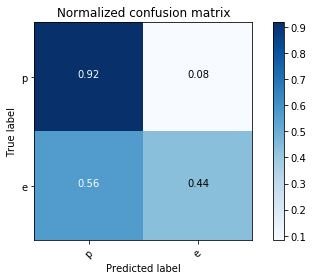

              precision    recall  f1-score   support

           p       0.73      0.94      0.82      1744
           e       0.82      0.45      0.58      1078

   micro avg       0.75      0.75      0.75      2822
   macro avg       0.78      0.69      0.70      2822
weighted avg       0.77      0.75      0.73      2822

accuracy:  0.7519489723600283


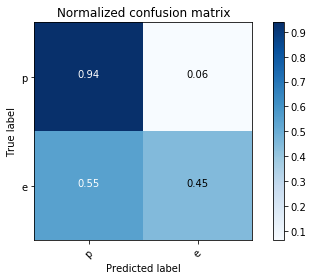

              precision    recall  f1-score   support

           p       0.73      0.91      0.81      1738
           e       0.76      0.45      0.57      1084

   micro avg       0.74      0.74      0.74      2822
   macro avg       0.74      0.68      0.69      2822
weighted avg       0.74      0.74      0.72      2822

accuracy:  0.7352941176470589


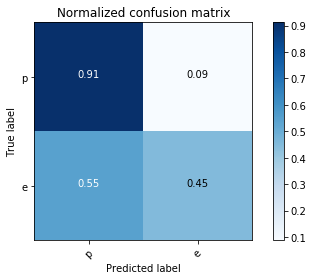

              precision    recall  f1-score   support

           p       0.73      0.94      0.82      1750
           e       0.81      0.42      0.56      1072

   micro avg       0.74      0.74      0.74      2822
   macro avg       0.77      0.68      0.69      2822
weighted avg       0.76      0.74      0.72      2822

accuracy:  0.742735648476258


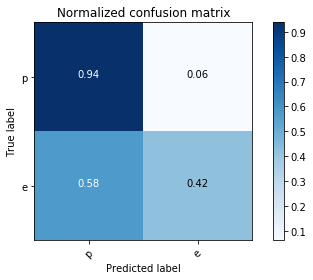

              precision    recall  f1-score   support

           p       0.72      0.92      0.81      1721
           e       0.79      0.45      0.57      1101

   micro avg       0.74      0.74      0.74      2822
   macro avg       0.76      0.69      0.69      2822
weighted avg       0.75      0.74      0.72      2822

accuracy:  0.7377746279234585


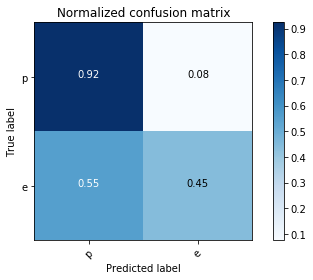

              precision    recall  f1-score   support

           p       0.74      0.93      0.82      1767
           e       0.79      0.45      0.57      1055

   micro avg       0.75      0.75      0.75      2822
   macro avg       0.77      0.69      0.70      2822
weighted avg       0.76      0.75      0.73      2822

accuracy:  0.7494684620836286


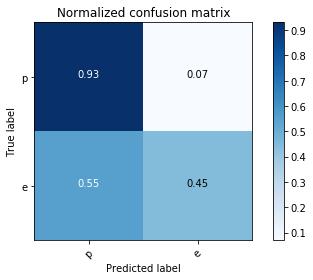

              precision    recall  f1-score   support

           p       0.73      0.93      0.81      1723
           e       0.80      0.45      0.57      1099

   micro avg       0.74      0.74      0.74      2822
   macro avg       0.76      0.69      0.69      2822
weighted avg       0.75      0.74      0.72      2822

accuracy:  0.7416725726435153


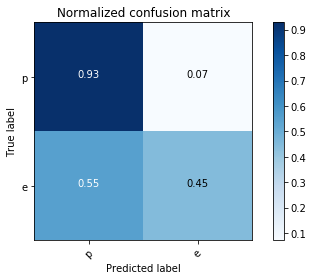

              precision    recall  f1-score   support

           p       0.73      0.93      0.82      1765
           e       0.79      0.43      0.55      1057

   micro avg       0.74      0.74      0.74      2822
   macro avg       0.76      0.68      0.69      2822
weighted avg       0.75      0.74      0.72      2822

accuracy:  0.7416725726435153


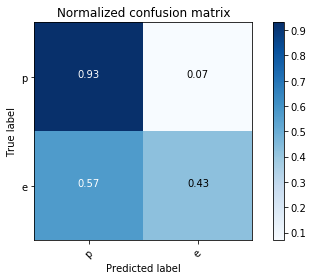

In [12]:
acc.append("Euclidean 50")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=50, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
#             print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

              precision    recall  f1-score   support

           p       0.71      0.98      0.82      1750
           e       0.90      0.33      0.49      1072

   micro avg       0.73      0.73      0.73      2822
   macro avg       0.80      0.66      0.65      2822
weighted avg       0.78      0.73      0.69      2822

accuracy:  0.7328136073706591


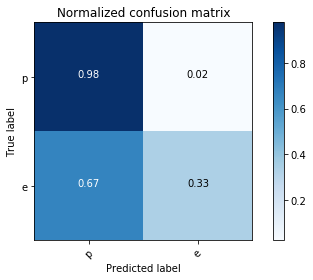

              precision    recall  f1-score   support

           p       0.71      0.97      0.82      1738
           e       0.87      0.37      0.52      1084

   micro avg       0.74      0.74      0.74      2822
   macro avg       0.79      0.67      0.67      2822
weighted avg       0.77      0.74      0.70      2822

accuracy:  0.7363571934798016


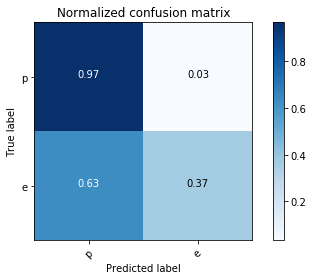

              precision    recall  f1-score   support

           p       0.72      0.96      0.82      1763
           e       0.84      0.37      0.51      1059

   micro avg       0.74      0.74      0.74      2822
   macro avg       0.78      0.66      0.67      2822
weighted avg       0.76      0.74      0.70      2822

accuracy:  0.7363571934798016


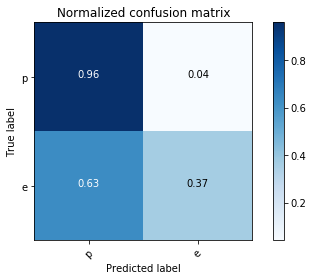

              precision    recall  f1-score   support

           p       0.70      0.98      0.82      1725
           e       0.91      0.34      0.49      1097

   micro avg       0.73      0.73      0.73      2822
   macro avg       0.81      0.66      0.66      2822
weighted avg       0.78      0.73      0.69      2822

accuracy:  0.7306874557051737


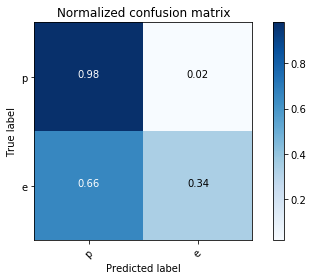

              precision    recall  f1-score   support

           p       0.73      0.97      0.83      1780
           e       0.87      0.38      0.53      1042

   micro avg       0.75      0.75      0.75      2822
   macro avg       0.80      0.67      0.68      2822
weighted avg       0.78      0.75      0.72      2822

accuracy:  0.7487597448618002


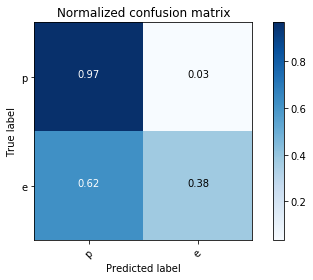

              precision    recall  f1-score   support

           p       0.69      0.98      0.81      1708
           e       0.91      0.33      0.48      1114

   micro avg       0.72      0.72      0.72      2822
   macro avg       0.80      0.65      0.65      2822
weighted avg       0.78      0.72      0.68      2822

accuracy:  0.721119773210489


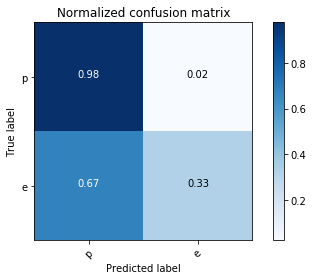

              precision    recall  f1-score   support

           p       0.72      0.96      0.82      1770
           e       0.84      0.36      0.51      1052

   micro avg       0.74      0.74      0.74      2822
   macro avg       0.78      0.66      0.66      2822
weighted avg       0.76      0.74      0.70      2822

accuracy:  0.7377746279234585


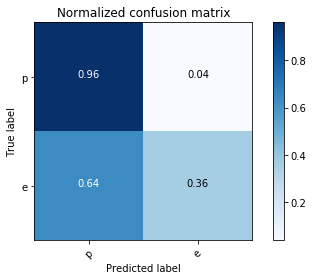

              precision    recall  f1-score   support

           p       0.70      0.98      0.82      1718
           e       0.93      0.34      0.50      1104

   micro avg       0.73      0.73      0.73      2822
   macro avg       0.81      0.66      0.66      2822
weighted avg       0.79      0.73      0.69      2822

accuracy:  0.7313961729270021


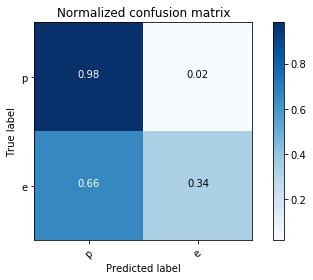

              precision    recall  f1-score   support

           p       0.71      0.96      0.82      1764
           e       0.84      0.35      0.50      1058

   micro avg       0.73      0.73      0.73      2822
   macro avg       0.78      0.66      0.66      2822
weighted avg       0.76      0.73      0.70      2822

accuracy:  0.7317505315379164


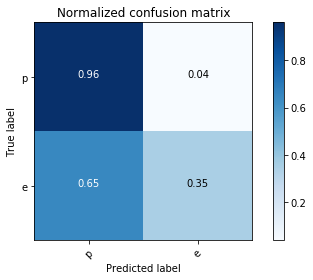

              precision    recall  f1-score   support

           p       0.70      0.98      0.82      1724
           e       0.91      0.35      0.50      1098

   micro avg       0.73      0.73      0.73      2822
   macro avg       0.81      0.66      0.66      2822
weighted avg       0.78      0.73      0.69      2822

accuracy:  0.7324592487597449


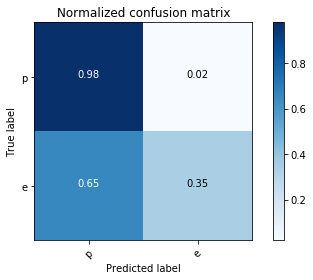

In [13]:
acc.append("Euclidean 100")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=100, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
#             print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

              precision    recall  f1-score   support

           p       0.69      0.99      0.82      1729
           e       0.97      0.31      0.47      1093

   micro avg       0.73      0.73      0.73      2822
   macro avg       0.83      0.65      0.64      2822
weighted avg       0.80      0.73      0.68      2822

accuracy:  0.7289156626506024


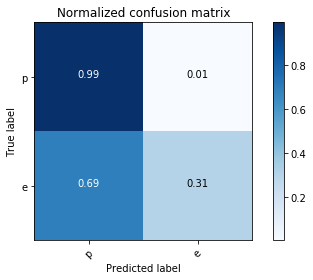

              precision    recall  f1-score   support

           p       0.71      0.98      0.83      1759
           e       0.92      0.35      0.51      1063

   micro avg       0.74      0.74      0.74      2822
   macro avg       0.82      0.67      0.67      2822
weighted avg       0.79      0.74      0.71      2822

accuracy:  0.7437987243090007


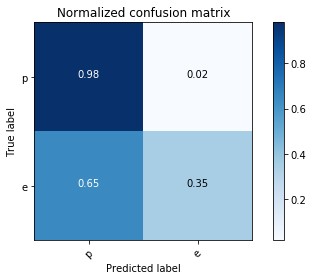

              precision    recall  f1-score   support

           p       0.71      0.99      0.83      1742
           e       0.96      0.34      0.50      1080

   micro avg       0.74      0.74      0.74      2822
   macro avg       0.84      0.67      0.66      2822
weighted avg       0.81      0.74      0.70      2822

accuracy:  0.742735648476258


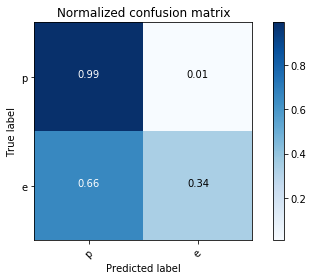

              precision    recall  f1-score   support

           p       0.70      0.99      0.82      1746
           e       0.93      0.32      0.47      1076

   micro avg       0.73      0.73      0.73      2822
   macro avg       0.82      0.65      0.65      2822
weighted avg       0.79      0.73      0.69      2822

accuracy:  0.7306874557051737


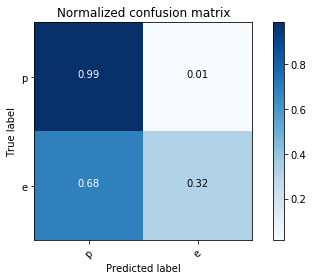

              precision    recall  f1-score   support

           p       0.70      0.99      0.82      1712
           e       0.96      0.33      0.49      1110

   micro avg       0.73      0.73      0.73      2822
   macro avg       0.83      0.66      0.65      2822
weighted avg       0.80      0.73      0.69      2822

accuracy:  0.7310418143160878


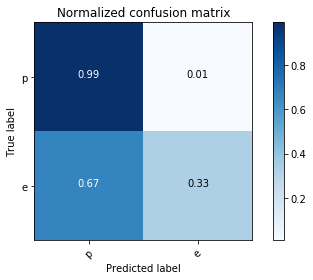

              precision    recall  f1-score   support

           p       0.71      0.99      0.83      1776
           e       0.95      0.33      0.49      1046

   micro avg       0.74      0.74      0.74      2822
   macro avg       0.83      0.66      0.66      2822
weighted avg       0.80      0.74      0.70      2822

accuracy:  0.7445074415308292


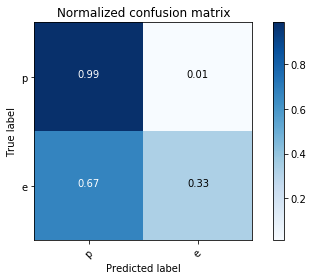

              precision    recall  f1-score   support

           p       0.70      0.99      0.82      1738
           e       0.96      0.32      0.48      1084

   micro avg       0.73      0.73      0.73      2822
   macro avg       0.83      0.65      0.65      2822
weighted avg       0.80      0.73      0.69      2822

accuracy:  0.7328136073706591


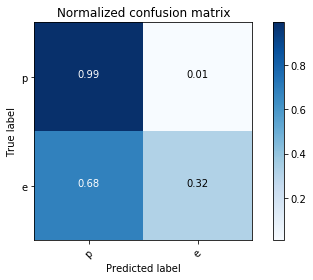

              precision    recall  f1-score   support

           p       0.71      0.99      0.83      1750
           e       0.95      0.34      0.50      1072

   micro avg       0.74      0.74      0.74      2822
   macro avg       0.83      0.66      0.66      2822
weighted avg       0.80      0.74      0.70      2822

accuracy:  0.741318214032601


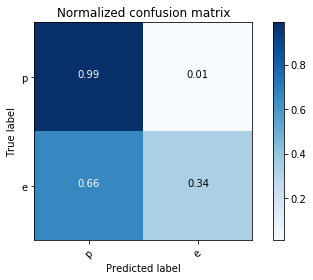

              precision    recall  f1-score   support

           p       0.71      0.98      0.82      1753
           e       0.91      0.35      0.51      1069

   micro avg       0.74      0.74      0.74      2822
   macro avg       0.81      0.66      0.67      2822
weighted avg       0.79      0.74      0.70      2822

accuracy:  0.7406094968107725


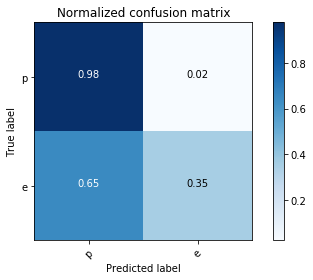

              precision    recall  f1-score   support

           p       0.70      1.00      0.82      1735
           e       0.98      0.31      0.47      1087

   micro avg       0.73      0.73      0.73      2822
   macro avg       0.84      0.65      0.64      2822
weighted avg       0.81      0.73      0.68      2822

accuracy:  0.7303330970942594


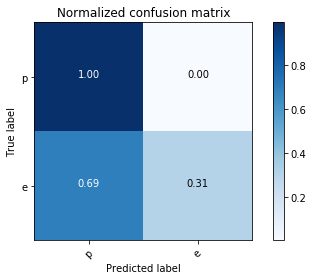

In [14]:
acc.append("Euclidean 150")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=150, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
#             print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

### Minkowski metric and k tunning

              precision    recall  f1-score   support

           p       0.80      0.81      0.80      1725
           e       0.69      0.68      0.68      1097

   micro avg       0.76      0.76      0.76      2822
   macro avg       0.74      0.74      0.74      2822
weighted avg       0.75      0.76      0.76      2822

accuracy:  0.7554925584691708


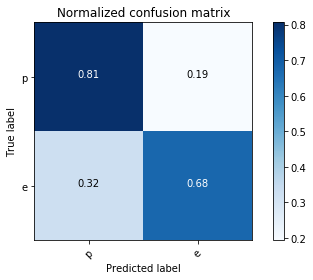

              precision    recall  f1-score   support

           p       0.80      0.78      0.79      1763
           e       0.65      0.68      0.67      1059

   micro avg       0.74      0.74      0.74      2822
   macro avg       0.73      0.73      0.73      2822
weighted avg       0.75      0.74      0.74      2822

accuracy:  0.7437987243090007


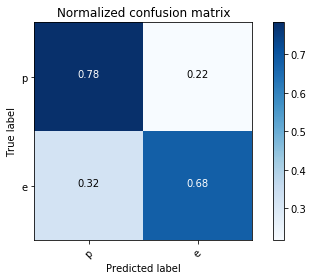

              precision    recall  f1-score   support

           p       0.80      0.81      0.81      1754
           e       0.69      0.67      0.68      1068

   micro avg       0.76      0.76      0.76      2822
   macro avg       0.74      0.74      0.74      2822
weighted avg       0.76      0.76      0.76      2822

accuracy:  0.7597448618001418


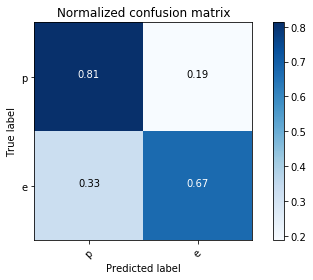

              precision    recall  f1-score   support

           p       0.80      0.79      0.80      1734
           e       0.68      0.69      0.68      1088

   micro avg       0.75      0.75      0.75      2822
   macro avg       0.74      0.74      0.74      2822
weighted avg       0.75      0.75      0.75      2822

accuracy:  0.7537207654145995


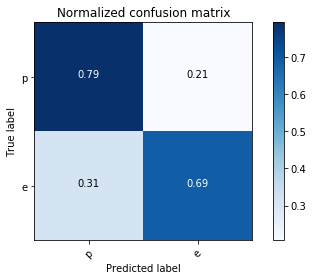

              precision    recall  f1-score   support

           p       0.80      0.80      0.80      1738
           e       0.68      0.67      0.68      1084

   micro avg       0.75      0.75      0.75      2822
   macro avg       0.74      0.74      0.74      2822
weighted avg       0.75      0.75      0.75      2822

accuracy:  0.7526576895818569


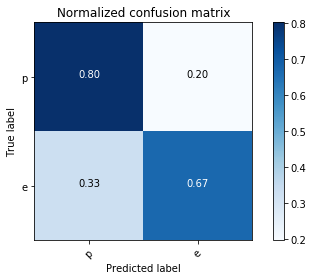

              precision    recall  f1-score   support

           p       0.80      0.81      0.80      1750
           e       0.68      0.67      0.68      1072

   micro avg       0.76      0.76      0.76      2822
   macro avg       0.74      0.74      0.74      2822
weighted avg       0.75      0.76      0.75      2822

accuracy:  0.7551381998582566


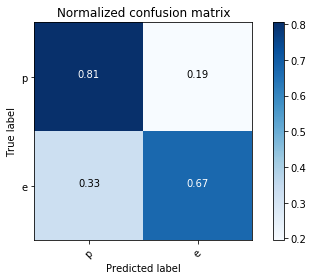

              precision    recall  f1-score   support

           p       0.82      0.78      0.80      1762
           e       0.66      0.72      0.69      1060

   micro avg       0.76      0.76      0.76      2822
   macro avg       0.74      0.75      0.75      2822
weighted avg       0.76      0.76      0.76      2822

accuracy:  0.7579730687455705


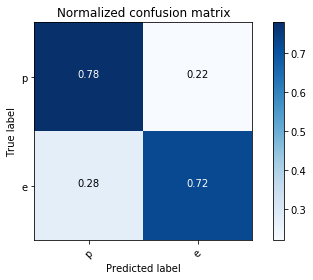

              precision    recall  f1-score   support

           p       0.79      0.82      0.80      1726
           e       0.70      0.67      0.68      1096

   micro avg       0.76      0.76      0.76      2822
   macro avg       0.75      0.74      0.74      2822
weighted avg       0.76      0.76      0.76      2822

accuracy:  0.7579730687455705


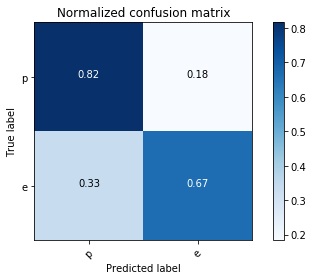

              precision    recall  f1-score   support

           p       0.80      0.78      0.79      1701
           e       0.68      0.69      0.69      1121

   micro avg       0.75      0.75      0.75      2822
   macro avg       0.74      0.74      0.74      2822
weighted avg       0.75      0.75      0.75      2822

accuracy:  0.7473423104181431


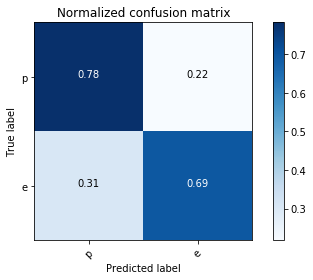

              precision    recall  f1-score   support

           p       0.80      0.79      0.79      1787
           e       0.64      0.66      0.65      1035

   micro avg       0.74      0.74      0.74      2822
   macro avg       0.72      0.72      0.72      2822
weighted avg       0.74      0.74      0.74      2822

accuracy:  0.7416725726435153


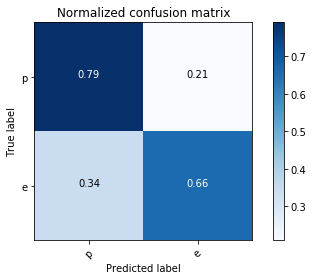

In [15]:
acc.append("Minkowski 1")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=1, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
#             print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

              precision    recall  f1-score   support

           p       0.79      0.84      0.81      1740
           e       0.71      0.63      0.67      1082

   micro avg       0.76      0.76      0.76      2822
   macro avg       0.75      0.74      0.74      2822
weighted avg       0.76      0.76      0.76      2822

accuracy:  0.7604535790219702


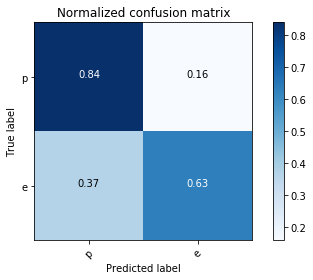

              precision    recall  f1-score   support

           p       0.79      0.84      0.81      1748
           e       0.71      0.63      0.67      1074

   micro avg       0.76      0.76      0.76      2822
   macro avg       0.75      0.73      0.74      2822
weighted avg       0.76      0.76      0.76      2822

accuracy:  0.760099220411056


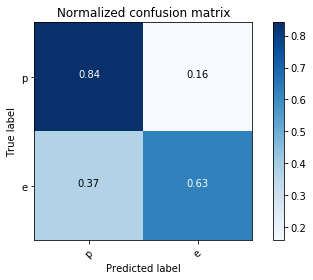

              precision    recall  f1-score   support

           p       0.78      0.86      0.82      1718
           e       0.74      0.62      0.68      1104

   micro avg       0.77      0.77      0.77      2822
   macro avg       0.76      0.74      0.75      2822
weighted avg       0.76      0.77      0.76      2822

accuracy:  0.7657689581856839


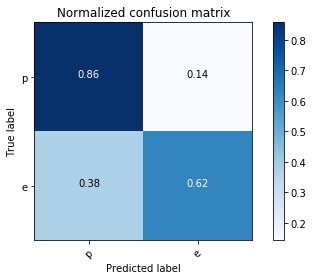

              precision    recall  f1-score   support

           p       0.79      0.82      0.80      1770
           e       0.67      0.63      0.65      1052

   micro avg       0.75      0.75      0.75      2822
   macro avg       0.73      0.73      0.73      2822
weighted avg       0.75      0.75      0.75      2822

accuracy:  0.7487597448618002


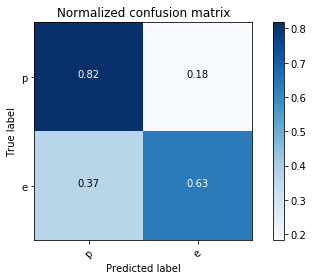

              precision    recall  f1-score   support

           p       0.79      0.83      0.81      1743
           e       0.71      0.65      0.68      1079

   micro avg       0.76      0.76      0.76      2822
   macro avg       0.75      0.74      0.75      2822
weighted avg       0.76      0.76      0.76      2822

accuracy:  0.7647058823529411


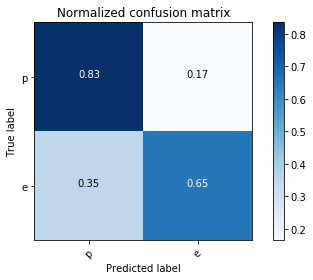

              precision    recall  f1-score   support

           p       0.77      0.83      0.80      1745
           e       0.69      0.60      0.64      1077

   micro avg       0.74      0.74      0.74      2822
   macro avg       0.73      0.72      0.72      2822
weighted avg       0.74      0.74      0.74      2822

accuracy:  0.7445074415308292


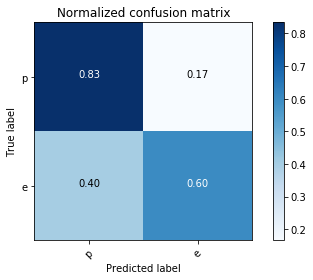

              precision    recall  f1-score   support

           p       0.78      0.83      0.81      1747
           e       0.69      0.62      0.66      1075

   micro avg       0.75      0.75      0.75      2822
   macro avg       0.74      0.73      0.73      2822
weighted avg       0.75      0.75      0.75      2822

accuracy:  0.7512402551381998


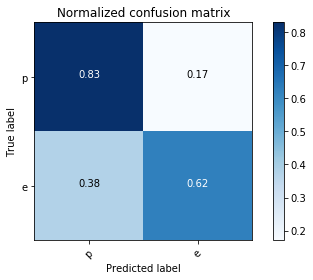

              precision    recall  f1-score   support

           p       0.78      0.84      0.81      1741
           e       0.71      0.61      0.66      1081

   micro avg       0.76      0.76      0.76      2822
   macro avg       0.74      0.73      0.73      2822
weighted avg       0.75      0.76      0.75      2822

accuracy:  0.7551381998582566


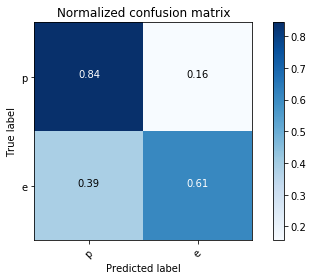

              precision    recall  f1-score   support

           p       0.79      0.83      0.81      1772
           e       0.69      0.63      0.66      1050

   micro avg       0.75      0.75      0.75      2822
   macro avg       0.74      0.73      0.73      2822
weighted avg       0.75      0.75      0.75      2822

accuracy:  0.7547838412473423


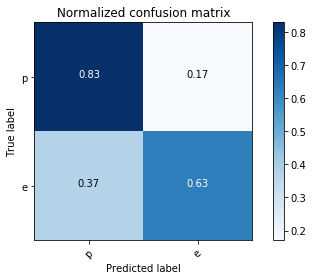

              precision    recall  f1-score   support

           p       0.78      0.85      0.81      1716
           e       0.73      0.62      0.67      1106

   micro avg       0.76      0.76      0.76      2822
   macro avg       0.75      0.74      0.74      2822
weighted avg       0.76      0.76      0.76      2822

accuracy:  0.760099220411056


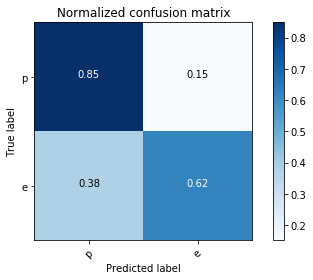

In [16]:
acc.append("Minkowski 5")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=5, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
#             print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

              precision    recall  f1-score   support

           p       0.76      0.90      0.83      1746
           e       0.77      0.55      0.64      1076

   micro avg       0.77      0.77      0.77      2822
   macro avg       0.77      0.72      0.73      2822
weighted avg       0.77      0.77      0.76      2822

accuracy:  0.7654145995747696


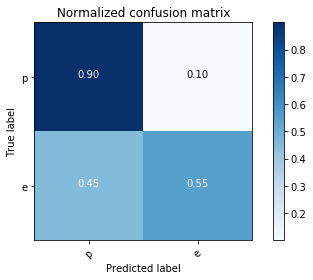

              precision    recall  f1-score   support

           p       0.77      0.90      0.83      1742
           e       0.78      0.57      0.66      1080

   micro avg       0.77      0.77      0.77      2822
   macro avg       0.78      0.74      0.75      2822
weighted avg       0.78      0.77      0.77      2822

accuracy:  0.7742735648476258


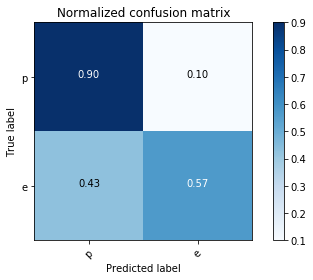

              precision    recall  f1-score   support

           p       0.76      0.90      0.83      1720
           e       0.78      0.57      0.66      1102

   micro avg       0.77      0.77      0.77      2822
   macro avg       0.77      0.73      0.74      2822
weighted avg       0.77      0.77      0.76      2822

accuracy:  0.7682494684620836


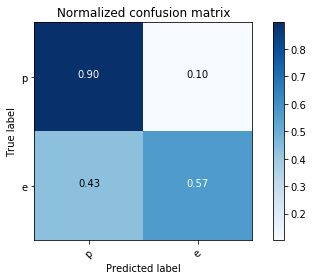

              precision    recall  f1-score   support

           p       0.78      0.90      0.83      1768
           e       0.78      0.56      0.65      1054

   micro avg       0.78      0.78      0.78      2822
   macro avg       0.78      0.73      0.74      2822
weighted avg       0.78      0.78      0.77      2822

accuracy:  0.7753366406803686


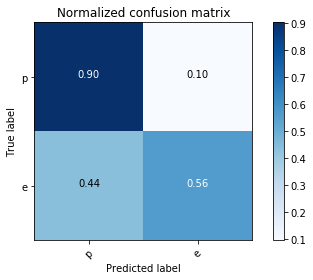

              precision    recall  f1-score   support

           p       0.77      0.91      0.83      1753
           e       0.78      0.56      0.65      1069

   micro avg       0.77      0.77      0.77      2822
   macro avg       0.78      0.73      0.74      2822
weighted avg       0.78      0.77      0.77      2822

accuracy:  0.7749822820694543


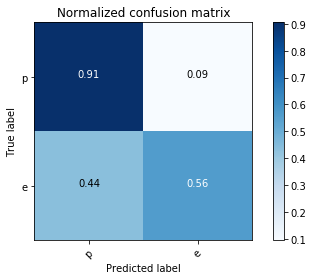

              precision    recall  f1-score   support

           p       0.77      0.89      0.83      1735
           e       0.77      0.57      0.66      1087

   micro avg       0.77      0.77      0.77      2822
   macro avg       0.77      0.73      0.74      2822
weighted avg       0.77      0.77      0.76      2822

accuracy:  0.7689581856839122


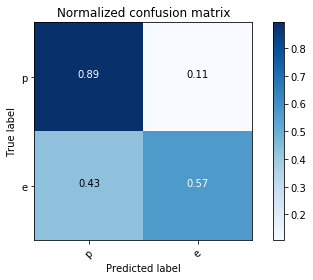

              precision    recall  f1-score   support

           p       0.77      0.90      0.83      1758
           e       0.77      0.54      0.64      1064

   micro avg       0.77      0.77      0.77      2822
   macro avg       0.77      0.72      0.73      2822
weighted avg       0.77      0.77      0.76      2822

accuracy:  0.7661233167965982


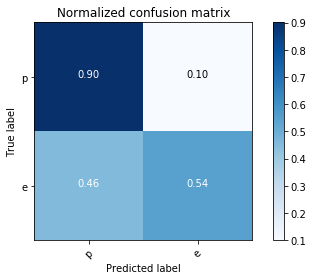

              precision    recall  f1-score   support

           p       0.77      0.90      0.83      1730
           e       0.78      0.58      0.67      1092

   micro avg       0.78      0.78      0.78      2822
   macro avg       0.78      0.74      0.75      2822
weighted avg       0.78      0.78      0.77      2822

accuracy:  0.7753366406803686


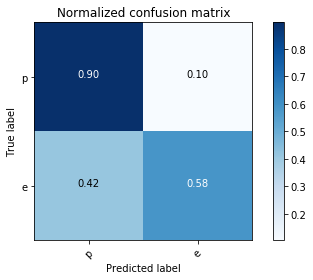

              precision    recall  f1-score   support

           p       0.77      0.89      0.83      1746
           e       0.76      0.58      0.66      1076

   micro avg       0.77      0.77      0.77      2822
   macro avg       0.77      0.73      0.74      2822
weighted avg       0.77      0.77      0.76      2822

accuracy:  0.7696669029057406


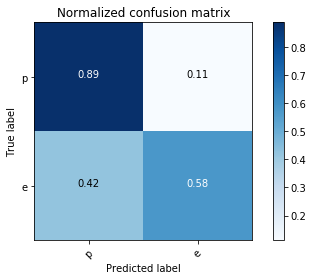

              precision    recall  f1-score   support

           p       0.76      0.90      0.82      1742
           e       0.77      0.54      0.64      1080

   micro avg       0.76      0.76      0.76      2822
   macro avg       0.77      0.72      0.73      2822
weighted avg       0.76      0.76      0.75      2822

accuracy:  0.7632884479092842


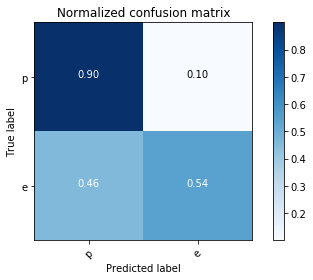

In [17]:
acc.append("Minkowski 10")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=10, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

              precision    recall  f1-score   support

           p       0.76      0.87      0.81      1709
           e       0.74      0.59      0.65      1113

   micro avg       0.76      0.76      0.76      2822
   macro avg       0.75      0.73      0.73      2822
weighted avg       0.75      0.76      0.75      2822

accuracy:  0.7551381998582566


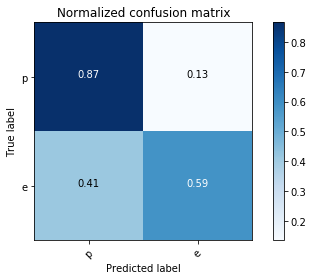

              precision    recall  f1-score   support

           p       0.78      0.88      0.83      1779
           e       0.74      0.57      0.65      1043

   micro avg       0.77      0.77      0.77      2822
   macro avg       0.76      0.73      0.74      2822
weighted avg       0.77      0.77      0.76      2822

accuracy:  0.7689581856839122


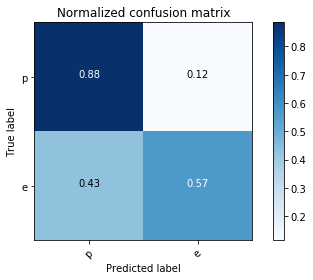

              precision    recall  f1-score   support

           p       0.78      0.87      0.82      1755
           e       0.74      0.59      0.66      1067

   micro avg       0.77      0.77      0.77      2822
   macro avg       0.76      0.73      0.74      2822
weighted avg       0.76      0.77      0.76      2822

accuracy:  0.7671863926293409


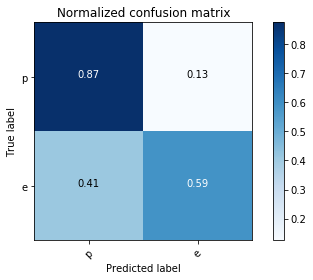

              precision    recall  f1-score   support

           p       0.77      0.89      0.83      1733
           e       0.77      0.58      0.66      1089

   micro avg       0.77      0.77      0.77      2822
   macro avg       0.77      0.73      0.74      2822
weighted avg       0.77      0.77      0.76      2822

accuracy:  0.7693125442948263


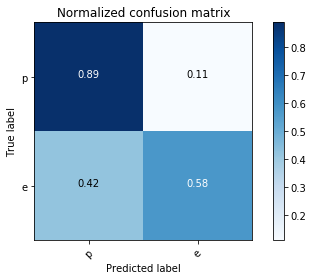

              precision    recall  f1-score   support

           p       0.76      0.89      0.82      1736
           e       0.77      0.56      0.65      1086

   micro avg       0.77      0.77      0.77      2822
   macro avg       0.77      0.73      0.74      2822
weighted avg       0.77      0.77      0.76      2822

accuracy:  0.7654145995747696


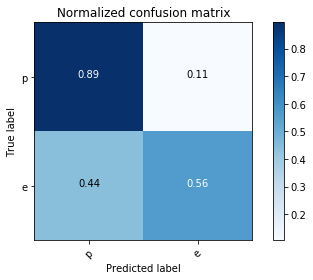

              precision    recall  f1-score   support

           p       0.78      0.87      0.82      1752
           e       0.73      0.59      0.65      1070

   micro avg       0.76      0.76      0.76      2822
   macro avg       0.75      0.73      0.74      2822
weighted avg       0.76      0.76      0.76      2822

accuracy:  0.7618710134656272


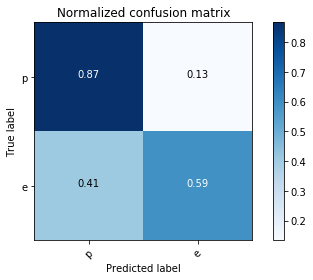

              precision    recall  f1-score   support

           p       0.78      0.86      0.82      1764
           e       0.72      0.60      0.66      1058

   micro avg       0.76      0.76      0.76      2822
   macro avg       0.75      0.73      0.74      2822
weighted avg       0.76      0.76      0.76      2822

accuracy:  0.761516654854713


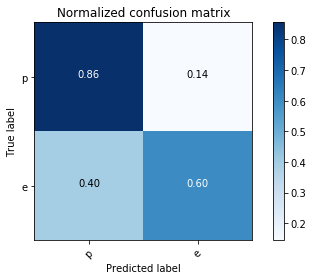

              precision    recall  f1-score   support

           p       0.76      0.89      0.82      1724
           e       0.76      0.56      0.65      1098

   micro avg       0.76      0.76      0.76      2822
   macro avg       0.76      0.72      0.73      2822
weighted avg       0.76      0.76      0.75      2822

accuracy:  0.7604535790219702


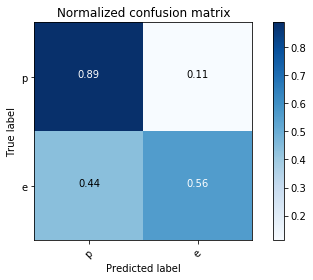

              precision    recall  f1-score   support

           p       0.77      0.88      0.82      1750
           e       0.74      0.57      0.64      1072

   micro avg       0.76      0.76      0.76      2822
   macro avg       0.75      0.72      0.73      2822
weighted avg       0.76      0.76      0.75      2822

accuracy:  0.7593905031892275


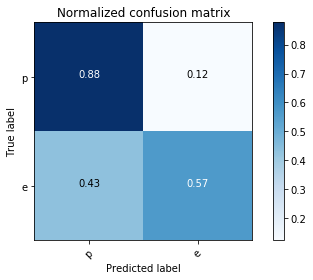

              precision    recall  f1-score   support

           p       0.77      0.86      0.81      1738
           e       0.73      0.59      0.65      1084

   micro avg       0.76      0.76      0.76      2822
   macro avg       0.75      0.73      0.73      2822
weighted avg       0.76      0.76      0.75      2822

accuracy:  0.758681785967399


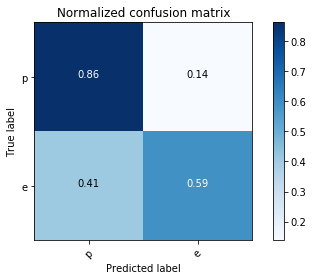

In [18]:
acc.append("Minkowski 15")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=15, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
#             print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

              precision    recall  f1-score   support

           p       0.76      0.88      0.82      1750
           e       0.74      0.54      0.63      1072

   micro avg       0.75      0.75      0.75      2822
   macro avg       0.75      0.71      0.72      2822
weighted avg       0.75      0.75      0.74      2822

accuracy:  0.7526576895818569


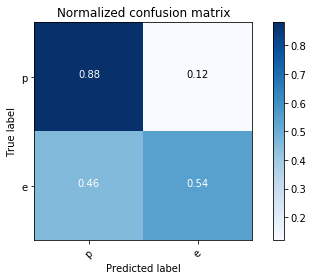

              precision    recall  f1-score   support

           p       0.76      0.92      0.83      1738
           e       0.80      0.53      0.64      1084

   micro avg       0.77      0.77      0.77      2822
   macro avg       0.78      0.72      0.73      2822
weighted avg       0.77      0.77      0.75      2822

accuracy:  0.7671863926293409


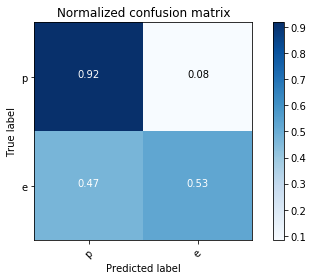

              precision    recall  f1-score   support

           p       0.77      0.90      0.83      1754
           e       0.77      0.55      0.64      1068

   micro avg       0.77      0.77      0.77      2822
   macro avg       0.77      0.72      0.73      2822
weighted avg       0.77      0.77      0.76      2822

accuracy:  0.7671863926293409


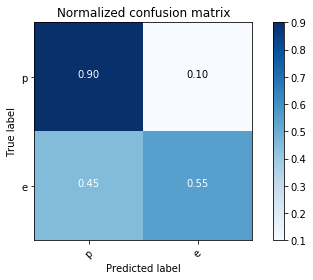

              precision    recall  f1-score   support

           p       0.75      0.91      0.82      1734
           e       0.79      0.51      0.62      1088

   micro avg       0.76      0.76      0.76      2822
   macro avg       0.77      0.71      0.72      2822
weighted avg       0.76      0.76      0.74      2822

accuracy:  0.757264351523742


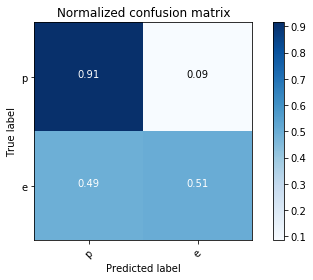

              precision    recall  f1-score   support

           p       0.76      0.91      0.83      1747
           e       0.79      0.53      0.63      1075

   micro avg       0.77      0.77      0.77      2822
   macro avg       0.77      0.72      0.73      2822
weighted avg       0.77      0.77      0.75      2822

accuracy:  0.7657689581856839


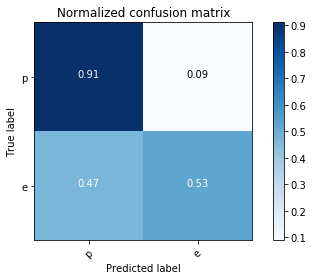

              precision    recall  f1-score   support

           p       0.76      0.90      0.82      1741
           e       0.77      0.53      0.63      1081

   micro avg       0.76      0.76      0.76      2822
   macro avg       0.76      0.72      0.73      2822
weighted avg       0.76      0.76      0.75      2822

accuracy:  0.7597448618001418


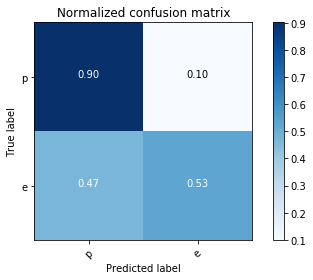

              precision    recall  f1-score   support

           p       0.76      0.93      0.83      1755
           e       0.82      0.51      0.63      1067

   micro avg       0.77      0.77      0.77      2822
   macro avg       0.79      0.72      0.73      2822
weighted avg       0.78      0.77      0.76      2822

accuracy:  0.7710843373493976


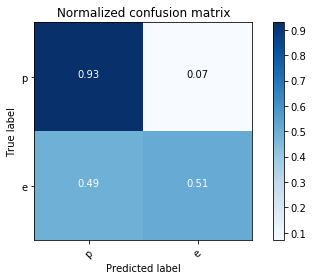

              precision    recall  f1-score   support

           p       0.76      0.89      0.82      1733
           e       0.76      0.56      0.64      1089

   micro avg       0.76      0.76      0.76      2822
   macro avg       0.76      0.72      0.73      2822
weighted avg       0.76      0.76      0.75      2822

accuracy:  0.760099220411056


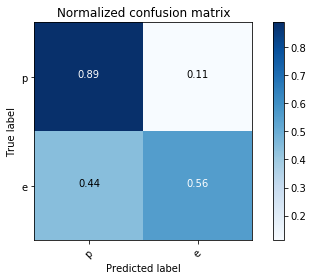

              precision    recall  f1-score   support

           p       0.75      0.92      0.83      1729
           e       0.80      0.53      0.64      1093

   micro avg       0.77      0.77      0.77      2822
   macro avg       0.78      0.72      0.73      2822
weighted avg       0.77      0.77      0.75      2822

accuracy:  0.7661233167965982


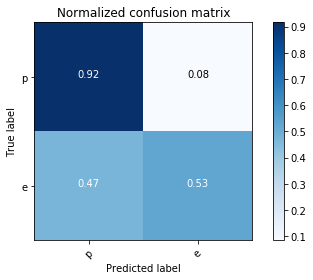

              precision    recall  f1-score   support

           p       0.77      0.90      0.83      1759
           e       0.76      0.55      0.64      1063

   micro avg       0.76      0.76      0.76      2822
   macro avg       0.76      0.72      0.73      2822
weighted avg       0.76      0.76      0.75      2822

accuracy:  0.7639971651311127


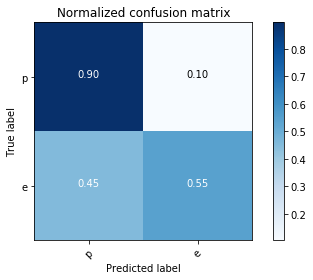

In [19]:
acc.append("Minkowski 20")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=20, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

              precision    recall  f1-score   support

           p       0.73      0.92      0.82      1719
           e       0.80      0.47      0.59      1103

   micro avg       0.75      0.75      0.75      2822
   macro avg       0.77      0.70      0.70      2822
weighted avg       0.76      0.75      0.73      2822

accuracy:  0.7466335931963146


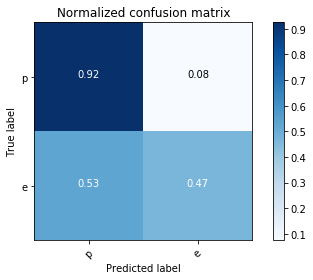

              precision    recall  f1-score   support

           p       0.76      0.89      0.82      1769
           e       0.75      0.53      0.62      1053

   micro avg       0.76      0.76      0.76      2822
   macro avg       0.75      0.71      0.72      2822
weighted avg       0.76      0.76      0.75      2822

accuracy:  0.7565556343019135


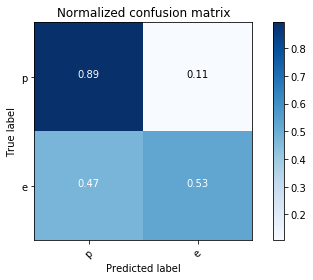

              precision    recall  f1-score   support

           p       0.74      0.91      0.82      1730
           e       0.77      0.50      0.61      1092

   micro avg       0.75      0.75      0.75      2822
   macro avg       0.76      0.70      0.71      2822
weighted avg       0.75      0.75      0.73      2822

accuracy:  0.7494684620836286


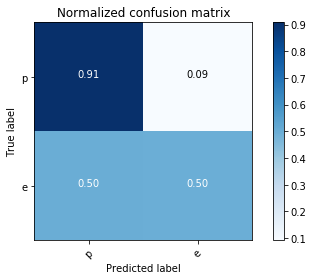

              precision    recall  f1-score   support

           p       0.75      0.90      0.82      1758
           e       0.75      0.51      0.61      1064

   micro avg       0.75      0.75      0.75      2822
   macro avg       0.75      0.71      0.71      2822
weighted avg       0.75      0.75      0.74      2822

accuracy:  0.7530120481927711


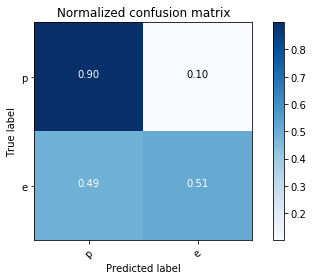

              precision    recall  f1-score   support

           p       0.74      0.92      0.82      1727
           e       0.79      0.49      0.61      1095

   micro avg       0.75      0.75      0.75      2822
   macro avg       0.77      0.71      0.71      2822
weighted avg       0.76      0.75      0.74      2822

accuracy:  0.7530120481927711


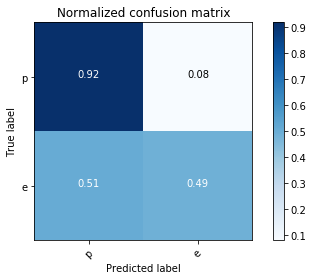

              precision    recall  f1-score   support

           p       0.76      0.91      0.83      1761
           e       0.78      0.52      0.62      1061

   micro avg       0.76      0.76      0.76      2822
   macro avg       0.77      0.71      0.72      2822
weighted avg       0.76      0.76      0.75      2822

accuracy:  0.7625797306874557


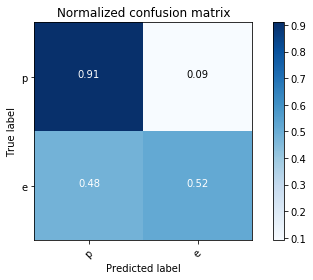

              precision    recall  f1-score   support

           p       0.73      0.93      0.82      1700
           e       0.82      0.48      0.60      1122

   micro avg       0.75      0.75      0.75      2822
   macro avg       0.77      0.70      0.71      2822
weighted avg       0.76      0.75      0.73      2822

accuracy:  0.7494684620836286


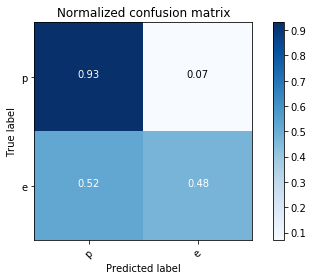

              precision    recall  f1-score   support

           p       0.77      0.90      0.83      1788
           e       0.76      0.55      0.64      1034

   micro avg       0.77      0.77      0.77      2822
   macro avg       0.77      0.72      0.74      2822
weighted avg       0.77      0.77      0.76      2822

accuracy:  0.7714386959603118


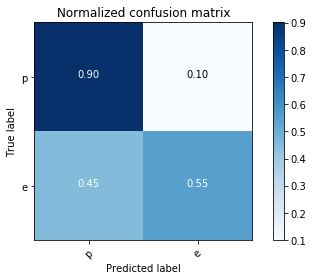

              precision    recall  f1-score   support

           p       0.77      0.92      0.84      1771
           e       0.80      0.53      0.64      1051

   micro avg       0.78      0.78      0.78      2822
   macro avg       0.78      0.73      0.74      2822
weighted avg       0.78      0.78      0.76      2822

accuracy:  0.7753366406803686


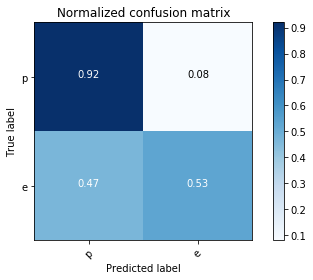

              precision    recall  f1-score   support

           p       0.73      0.91      0.81      1717
           e       0.77      0.48      0.59      1105

   micro avg       0.74      0.74      0.74      2822
   macro avg       0.75      0.69      0.70      2822
weighted avg       0.74      0.74      0.72      2822

accuracy:  0.7374202693125443


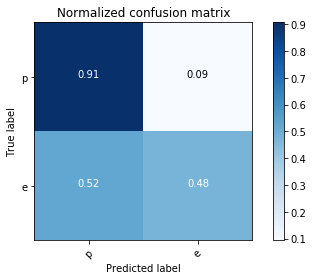

In [20]:
acc.append("Minkowski 30")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=30, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

              precision    recall  f1-score   support

           p       0.73      0.92      0.81      1742
           e       0.78      0.45      0.57      1080

   micro avg       0.74      0.74      0.74      2822
   macro avg       0.75      0.69      0.69      2822
weighted avg       0.75      0.74      0.72      2822

accuracy:  0.7409638554216867


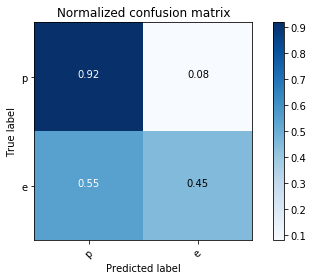

              precision    recall  f1-score   support

           p       0.72      0.94      0.82      1746
           e       0.81      0.42      0.55      1076

   micro avg       0.74      0.74      0.74      2822
   macro avg       0.77      0.68      0.68      2822
weighted avg       0.76      0.74      0.72      2822

accuracy:  0.739900779588944


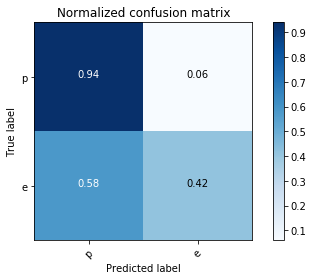

              precision    recall  f1-score   support

           p       0.72      0.92      0.81      1727
           e       0.79      0.45      0.57      1095

   micro avg       0.74      0.74      0.74      2822
   macro avg       0.76      0.68      0.69      2822
weighted avg       0.75      0.74      0.72      2822

accuracy:  0.7381289865343728


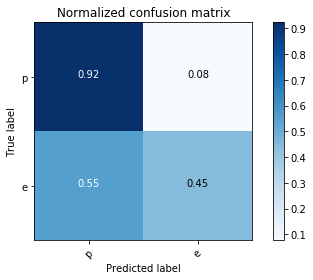

              precision    recall  f1-score   support

           p       0.73      0.93      0.82      1761
           e       0.79      0.44      0.57      1061

   micro avg       0.75      0.75      0.75      2822
   macro avg       0.76      0.69      0.69      2822
weighted avg       0.75      0.75      0.72      2822

accuracy:  0.7455705173635719


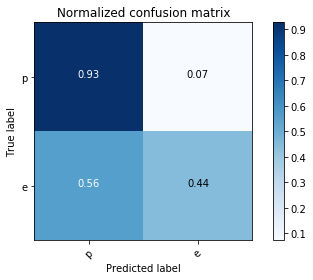

              precision    recall  f1-score   support

           p       0.73      0.93      0.82      1746
           e       0.79      0.45      0.57      1076

   micro avg       0.75      0.75      0.75      2822
   macro avg       0.76      0.69      0.70      2822
weighted avg       0.76      0.75      0.73      2822

accuracy:  0.7452161587526577


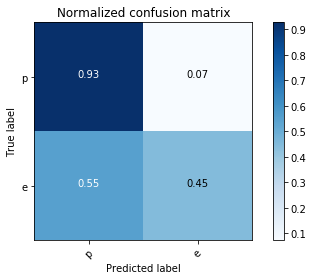

              precision    recall  f1-score   support

           p       0.73      0.94      0.82      1742
           e       0.81      0.45      0.58      1080

   micro avg       0.75      0.75      0.75      2822
   macro avg       0.77      0.69      0.70      2822
weighted avg       0.76      0.75      0.73      2822

accuracy:  0.7484053862508859


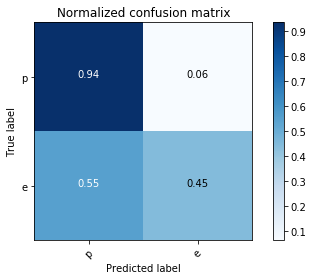

              precision    recall  f1-score   support

           p       0.74      0.93      0.82      1769
           e       0.80      0.45      0.57      1053

   micro avg       0.75      0.75      0.75      2822
   macro avg       0.77      0.69      0.70      2822
weighted avg       0.76      0.75      0.73      2822

accuracy:  0.7512402551381998


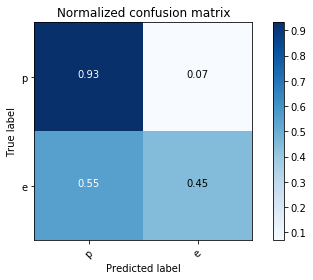

              precision    recall  f1-score   support

           p       0.72      0.93      0.81      1719
           e       0.80      0.44      0.57      1103

   micro avg       0.74      0.74      0.74      2822
   macro avg       0.76      0.69      0.69      2822
weighted avg       0.75      0.74      0.72      2822

accuracy:  0.739900779588944


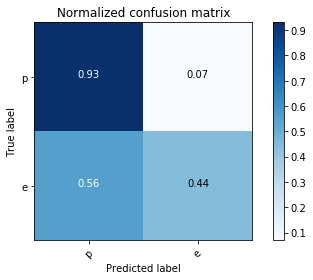

              precision    recall  f1-score   support

           p       0.74      0.95      0.83      1755
           e       0.85      0.44      0.58      1067

   micro avg       0.76      0.76      0.76      2822
   macro avg       0.79      0.69      0.70      2822
weighted avg       0.78      0.76      0.73      2822

accuracy:  0.7569099929128278


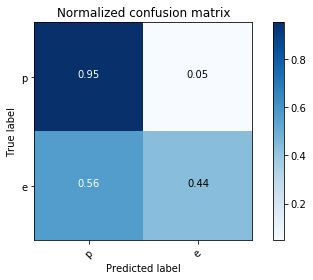

              precision    recall  f1-score   support

           p       0.72      0.92      0.80      1733
           e       0.76      0.43      0.55      1089

   micro avg       0.73      0.73      0.73      2822
   macro avg       0.74      0.67      0.67      2822
weighted avg       0.73      0.73      0.70      2822

accuracy:  0.7260807937632885


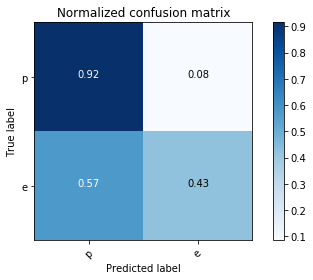

In [21]:
acc.append("Minkowski 50")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=50, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

              precision    recall  f1-score   support

           p       0.71      0.97      0.82      1758
           e       0.88      0.35      0.51      1064

   micro avg       0.74      0.74      0.74      2822
   macro avg       0.80      0.66      0.66      2822
weighted avg       0.78      0.74      0.70      2822

accuracy:  0.7381289865343728


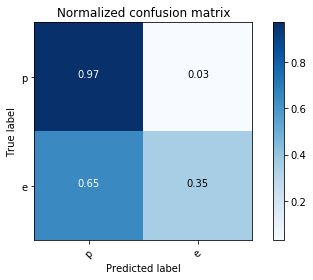

              precision    recall  f1-score   support

           p       0.70      0.98      0.82      1730
           e       0.90      0.35      0.50      1092

   micro avg       0.73      0.73      0.73      2822
   macro avg       0.80      0.66      0.66      2822
weighted avg       0.78      0.73      0.69      2822

accuracy:  0.7321048901488306


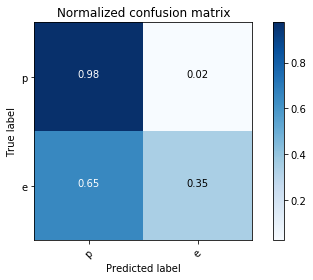

              precision    recall  f1-score   support

           p       0.72      0.96      0.83      1788
           e       0.85      0.36      0.50      1034

   micro avg       0.74      0.74      0.74      2822
   macro avg       0.79      0.66      0.66      2822
weighted avg       0.77      0.74      0.71      2822

accuracy:  0.741318214032601


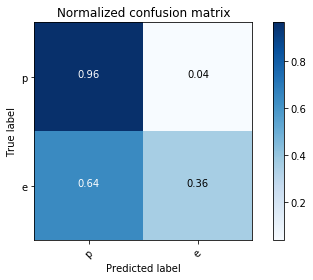

              precision    recall  f1-score   support

           p       0.69      0.98      0.81      1700
           e       0.91      0.34      0.49      1122

   micro avg       0.72      0.72      0.72      2822
   macro avg       0.80      0.66      0.65      2822
weighted avg       0.78      0.72      0.68      2822

accuracy:  0.7243090007087172


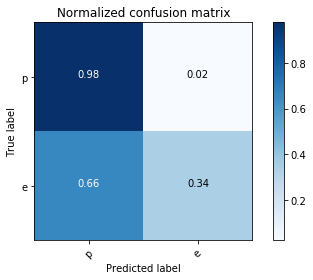

              precision    recall  f1-score   support

           p       0.71      0.96      0.82      1767
           e       0.84      0.36      0.50      1055

   micro avg       0.73      0.73      0.73      2822
   macro avg       0.78      0.66      0.66      2822
weighted avg       0.76      0.73      0.70      2822

accuracy:  0.7342310418143161


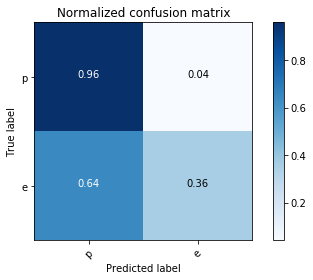

              precision    recall  f1-score   support

           p       0.70      0.98      0.82      1721
           e       0.93      0.34      0.49      1101

   micro avg       0.73      0.73      0.73      2822
   macro avg       0.81      0.66      0.65      2822
weighted avg       0.79      0.73      0.69      2822

accuracy:  0.7306874557051737


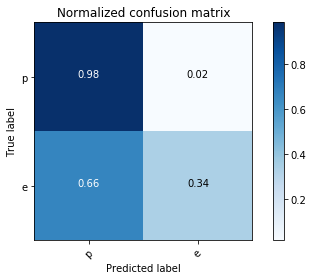

              precision    recall  f1-score   support

           p       0.72      0.98      0.83      1778
           e       0.89      0.34      0.49      1044

   micro avg       0.74      0.74      0.74      2822
   macro avg       0.80      0.66      0.66      2822
weighted avg       0.78      0.74      0.70      2822

accuracy:  0.7402551381998582


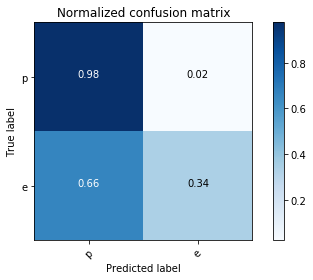

              precision    recall  f1-score   support

           p       0.70      0.96      0.81      1710
           e       0.86      0.36      0.51      1112

   micro avg       0.72      0.72      0.72      2822
   macro avg       0.78      0.66      0.66      2822
weighted avg       0.76      0.72      0.69      2822

accuracy:  0.723954642097803


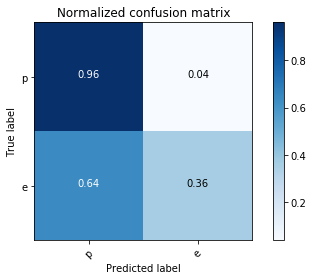

              precision    recall  f1-score   support

           p       0.71      0.98      0.82      1727
           e       0.91      0.36      0.52      1095

   micro avg       0.74      0.74      0.74      2822
   macro avg       0.81      0.67      0.67      2822
weighted avg       0.79      0.74      0.70      2822

accuracy:  0.7381289865343728


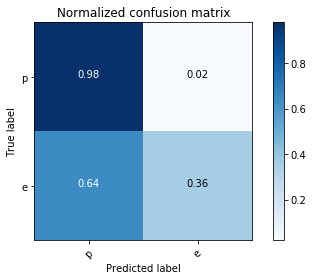

              precision    recall  f1-score   support

           p       0.71      0.97      0.82      1761
           e       0.87      0.34      0.49      1061

   micro avg       0.73      0.73      0.73      2822
   macro avg       0.79      0.66      0.66      2822
weighted avg       0.77      0.73      0.70      2822

accuracy:  0.7349397590361446


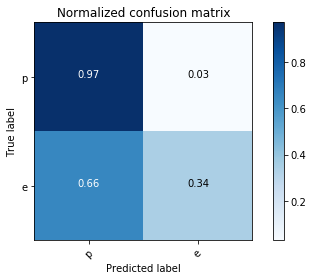

In [22]:
acc.append("Minkowski 100")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=100, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

              precision    recall  f1-score   support

           p       0.71      0.99      0.82      1731
           e       0.97      0.34      0.50      1091

   micro avg       0.74      0.74      0.74      2822
   macro avg       0.84      0.67      0.66      2822
weighted avg       0.81      0.74      0.70      2822

accuracy:  0.7409638554216867


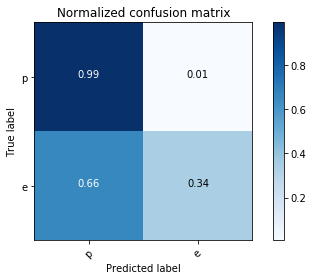

              precision    recall  f1-score   support

           p       0.70      0.99      0.82      1757
           e       0.93      0.32      0.47      1065

   micro avg       0.73      0.73      0.73      2822
   macro avg       0.82      0.65      0.65      2822
weighted avg       0.79      0.73      0.69      2822

accuracy:  0.7335223245924876


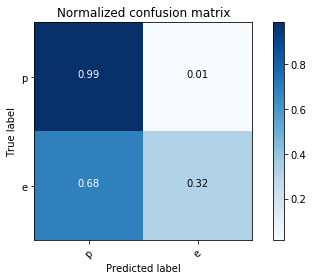

              precision    recall  f1-score   support

           p       0.70      0.99      0.82      1743
           e       0.95      0.32      0.48      1079

   micro avg       0.73      0.73      0.73      2822
   macro avg       0.83      0.65      0.65      2822
weighted avg       0.80      0.73      0.69      2822

accuracy:  0.7335223245924876


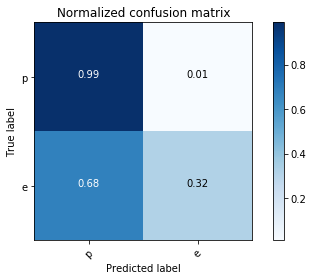

              precision    recall  f1-score   support

           p       0.71      0.99      0.82      1745
           e       0.95      0.33      0.50      1077

   micro avg       0.74      0.74      0.74      2822
   macro avg       0.83      0.66      0.66      2822
weighted avg       0.80      0.74      0.70      2822

accuracy:  0.739900779588944


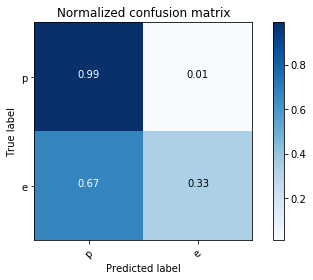

              precision    recall  f1-score   support

           p       0.70      0.99      0.82      1741
           e       0.95      0.31      0.47      1081

   micro avg       0.73      0.73      0.73      2822
   macro avg       0.82      0.65      0.64      2822
weighted avg       0.79      0.73      0.68      2822

accuracy:  0.7292700212615166


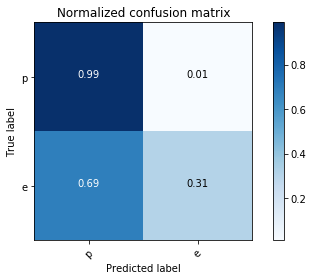

              precision    recall  f1-score   support

           p       0.71      0.99      0.83      1747
           e       0.94      0.35      0.51      1075

   micro avg       0.74      0.74      0.74      2822
   macro avg       0.83      0.67      0.67      2822
weighted avg       0.80      0.74      0.70      2822

accuracy:  0.742735648476258


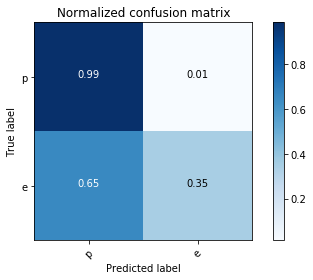

              precision    recall  f1-score   support

           p       0.71      0.99      0.82      1760
           e       0.94      0.32      0.47      1062

   micro avg       0.74      0.74      0.74      2822
   macro avg       0.82      0.65      0.65      2822
weighted avg       0.80      0.74      0.69      2822

accuracy:  0.7360028348688873


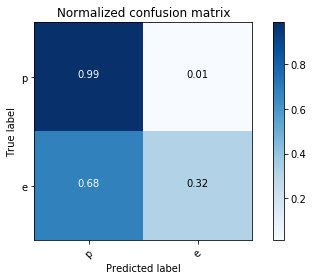

              precision    recall  f1-score   support

           p       0.70      0.99      0.82      1728
           e       0.97      0.34      0.50      1094

   micro avg       0.74      0.74      0.74      2822
   macro avg       0.83      0.66      0.66      2822
weighted avg       0.80      0.74      0.70      2822

accuracy:  0.7377746279234585


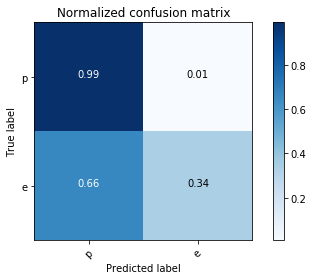

              precision    recall  f1-score   support

           p       0.70      0.99      0.82      1745
           e       0.96      0.32      0.48      1077

   micro avg       0.74      0.74      0.74      2822
   macro avg       0.83      0.66      0.65      2822
weighted avg       0.80      0.74      0.69      2822

accuracy:  0.7367115520907158


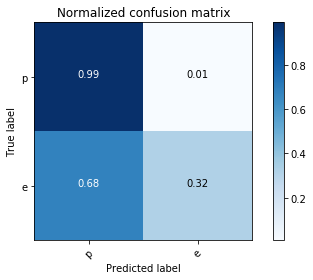

              precision    recall  f1-score   support

           p       0.70      0.99      0.82      1743
           e       0.94      0.33      0.49      1079

   micro avg       0.74      0.74      0.74      2822
   macro avg       0.82      0.66      0.66      2822
weighted avg       0.79      0.74      0.70      2822

accuracy:  0.7360028348688873


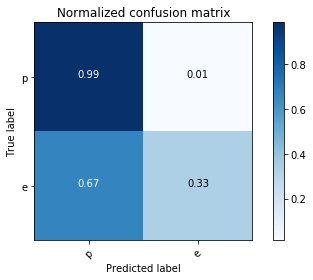

In [23]:
acc.append("Minkowski 150")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=150, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

In [24]:
with open("accMushroomKNNWith33Noise.csv", 'w') as myfile:
    wr = csv.writer(myfile, delimiter='\n')
    wr.writerow(acc)
    #writer.writerow(list_of_emails)